In [141]:
# Importing necessary packages
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [224]:
# Reading the data
data = pd.read_csv('Country-data.csv')

In [225]:
data.shape

(167, 10)

In [226]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [227]:
# gdpp has been taken for total population, let's convert it in to percentage by taking 1000 as count of population
data['gdpp'] = data['gdpp']/1000.0

In [228]:
# Checking the count of unique countries 
data['country'].value_counts()

Myanmar                1
Brunei                 1
Cambodia               1
Morocco                1
Belarus                1
Libya                  1
Maldives               1
Kazakhstan             1
Bolivia                1
Peru                   1
Colombia               1
Kuwait                 1
Tanzania               1
Haiti                  1
Pakistan               1
Mongolia               1
India                  1
Angola                 1
Switzerland            1
Belgium                1
Antigua and Barbuda    1
Malawi                 1
Rwanda                 1
Samoa                  1
Equatorial Guinea      1
Iraq                   1
South Africa           1
El Salvador            1
Montenegro             1
Mali                   1
                      ..
Uruguay                1
Paraguay               1
Russia                 1
Ireland                1
Cameroon               1
Spain                  1
United Kingdom         1
Uzbekistan             1
Tonga                  1


- So there are 167 unique countries in the dataset

In [229]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12.964156
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18.328705
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,0.231000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1.330000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4.660000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14.050000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105.000000


In [230]:
# Checking Missing values from the dataset
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

 Luckily there are no missing values, So no need of any imputation

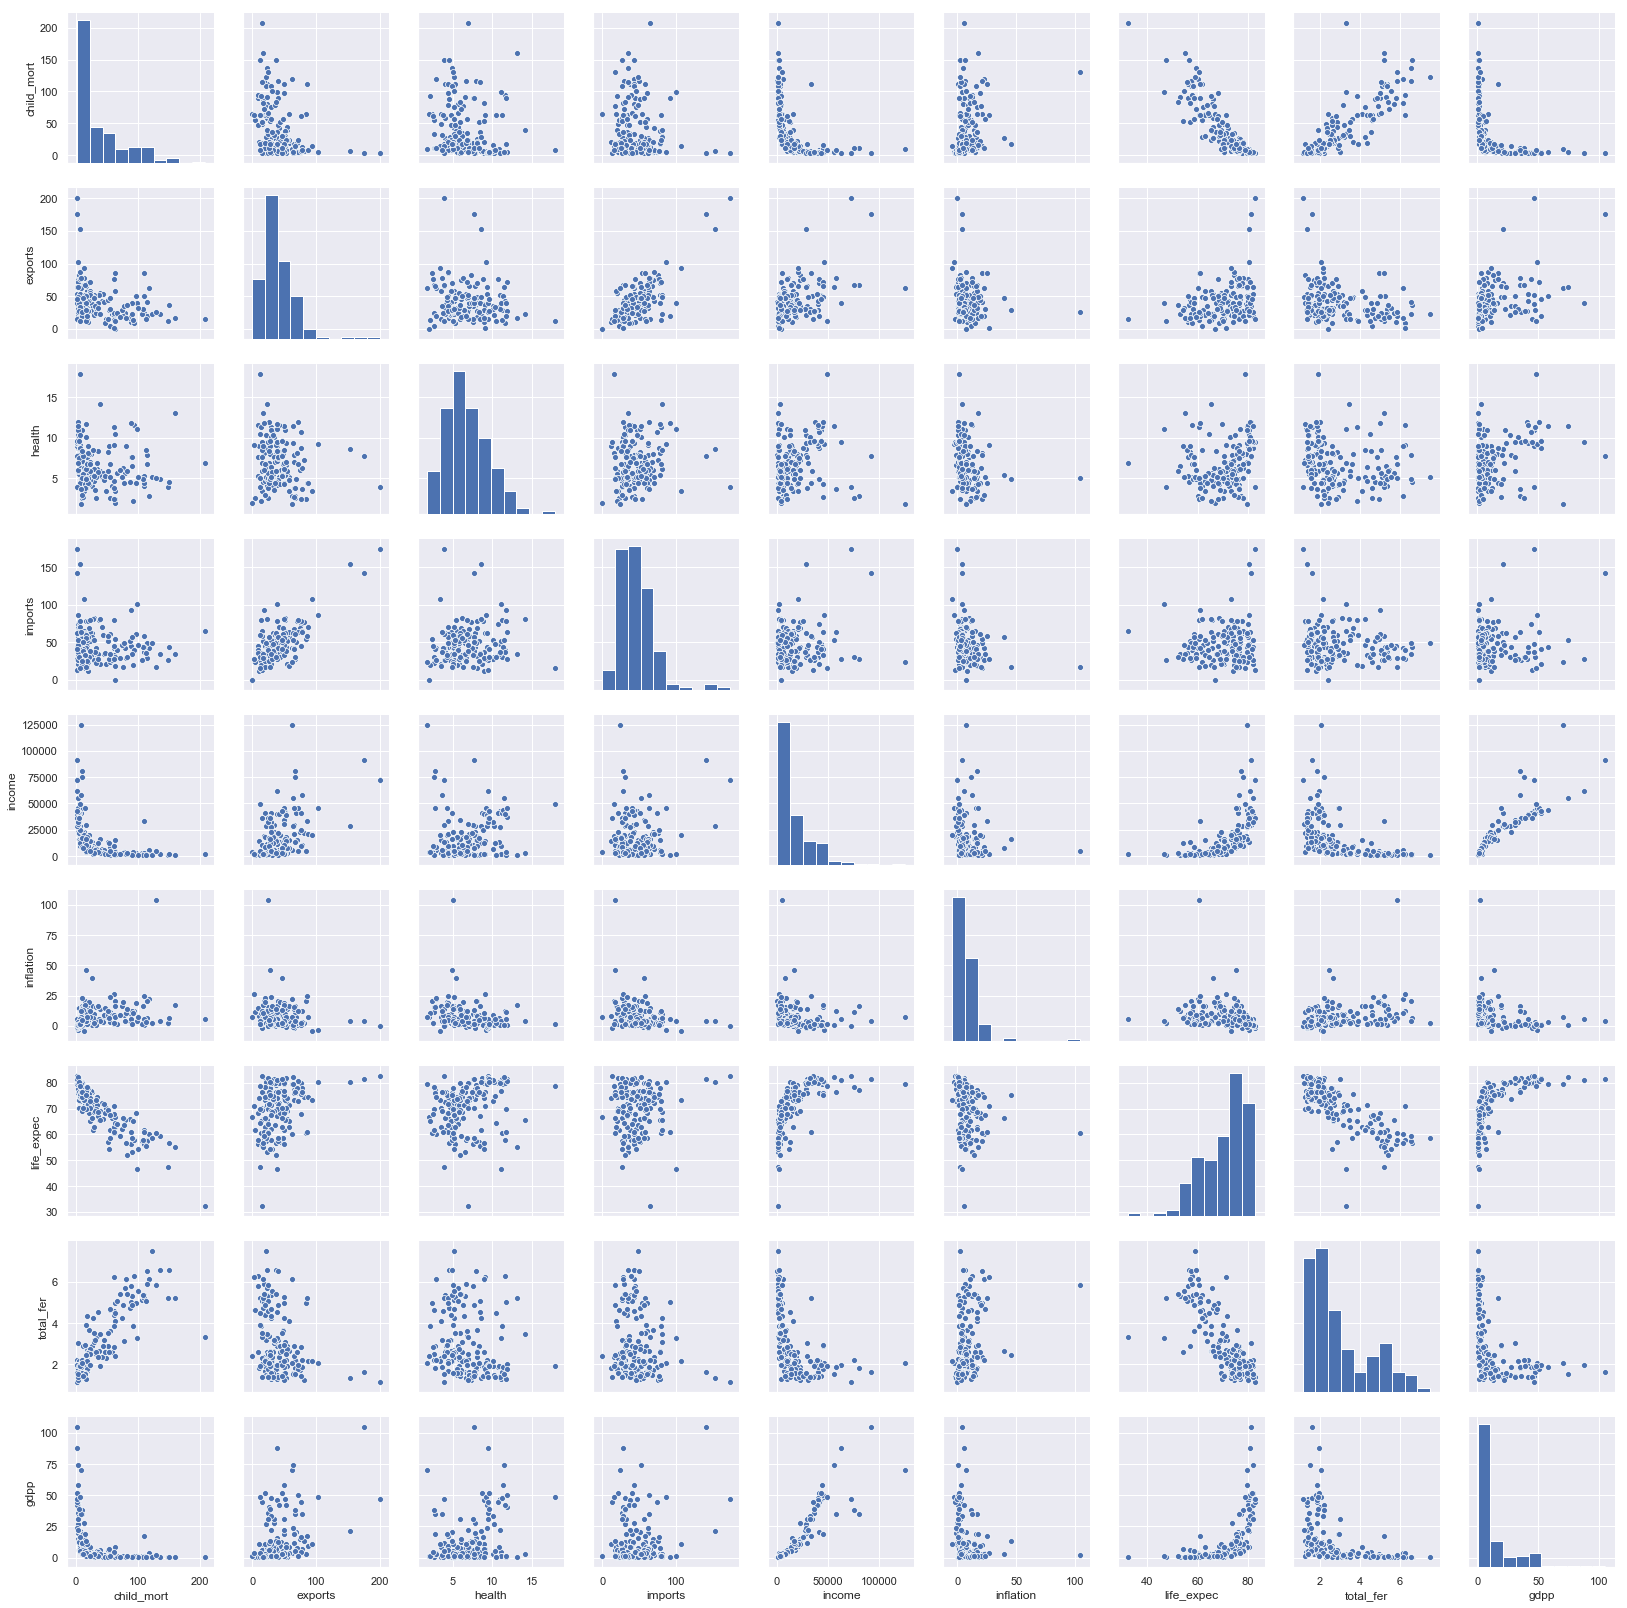

In [231]:
# Visualizing all the variables and their relations using pair plot
sns.pairplot(data)

- From the above graph:
    - child_mortality and life_expectancy are negatively correlated
    - child_mortality and total_fertility are positively correlated
    - Income and GDP percapita are positively correlated
    - Imports and exports are positively correlated
    

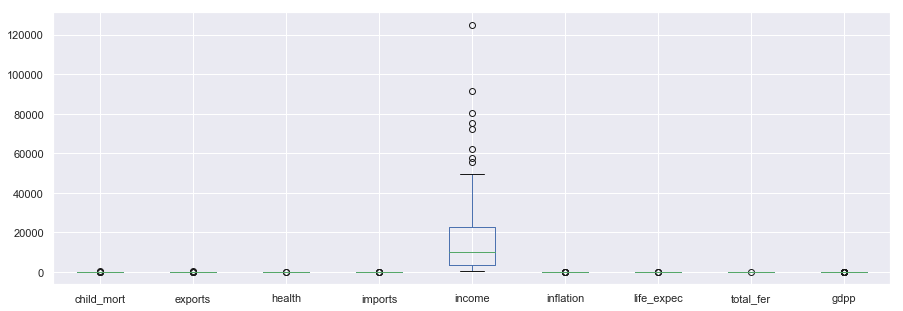

In [232]:
data.iloc[:,1:].boxplot(figsize=(15,5))


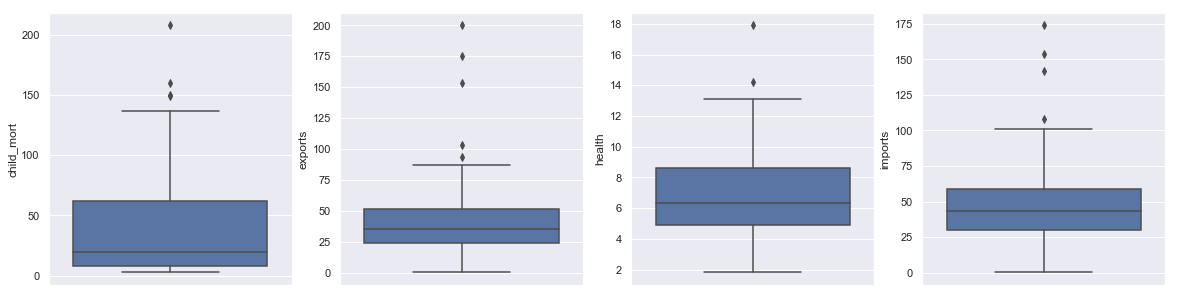

In [233]:
## Checking outliers from the data
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=4,figsize=(20,5))
sns.boxplot(data =data,x='child_mort',ax=ax[0],orient='v')
sns.boxplot(data =data,x='exports',ax=ax[1],orient='v')
sns.boxplot(data =data,x='health',ax=ax[2],orient='v')
sns.boxplot(data =data,x='imports',ax=ax[3],orient='v')


- from the above graphs all columns are having outliers

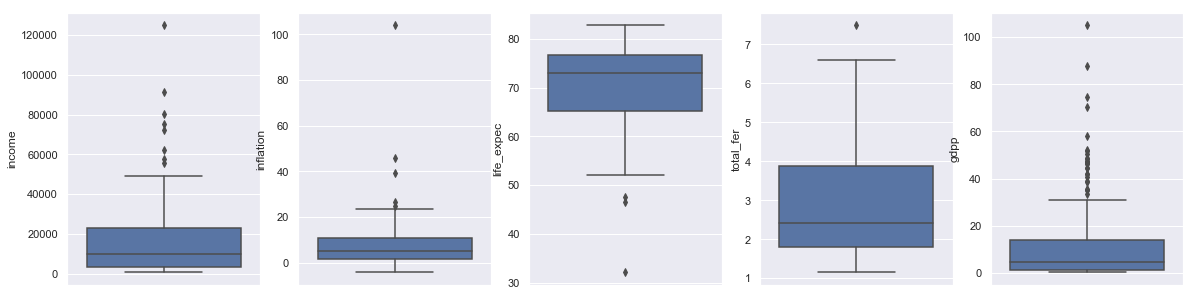

In [234]:
sns.set(style="darkgrid")
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,5))
sns.boxplot(data =data,x='income',ax=ax[0],orient='v')
sns.boxplot(data =data,x='inflation',ax=ax[1],orient='v')
sns.boxplot(data =data,x='life_expec',ax=ax[2],orient='v')
sns.boxplot(data =data,x='total_fer',ax=ax[3],orient='v')
sns.boxplot(data =data,x='gdpp',ax=ax[4],orient='v')


- Here also we could see there are outliers in the all variables

In [235]:
# Outlier Treatment
def deloutlier(col,df):
    upper_quartile = np.percentile(df[col], 75)
    lower_quartile = np.percentile(df[col], 25)
    iqr = upper_quartile - lower_quartile
    return (df[(df[col]> (lower_quartile-1.5*iqr))&(df[col]<(upper_quartile+1.5*iqr))][col])
      

In [236]:
data['child_mort'] = deloutlier('child_mort',data)
data['exports'] = deloutlier('exports',data)
data['health'] = deloutlier('health',data)
data['imports'] = deloutlier('imports',data)
data['income'] = deloutlier('income',data)
data['inflation'] = deloutlier('inflation',data)
data['life_expec'] = deloutlier('life_expec',data)
data['total_fer'] = deloutlier('total_fer',data)
data['gdpp'] = deloutlier('gdpp',data)

In [237]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,163.000000,162.000000,165.000000,163.000000,159.000000,162.000000,164.000000,166.000000,142.000000
mean,35.117178,37.903698,6.703758,44.494883,14107.943396,6.537444,71.077439,2.920602,6.340944
std,35.135954,19.428396,2.557905,18.583875,13185.988898,6.082514,8.024107,1.476428,7.110007
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,52.000000,1.150000,0.231000
25%,7.850000,23.575000,4.910000,29.950000,3300.000000,1.747500,65.475000,1.792500,1.205000
50%,19.100000,34.900000,6.220000,43.000000,9860.000000,4.700000,73.250000,2.395000,3.575000
75%,56.150000,50.575000,8.500000,57.500000,20250.000000,9.717500,76.825000,3.847500,8.637500
max,137.000000,86.900000,13.100000,101.000000,49400.000000,23.600000,82.800000,6.590000,30.800000


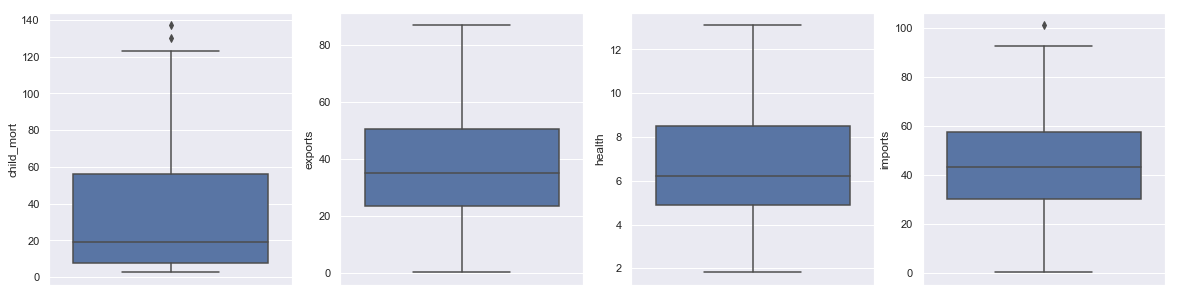

In [238]:
# Lets check the box plots again 

sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=4,figsize=(20,5))
sns.boxplot(data =data,x='child_mort',ax=ax[0],orient='v')
sns.boxplot(data =data,x='exports',ax=ax[1],orient='v')
sns.boxplot(data =data,x='health',ax=ax[2],orient='v')
sns.boxplot(data =data,x='imports',ax=ax[3],orient='v')


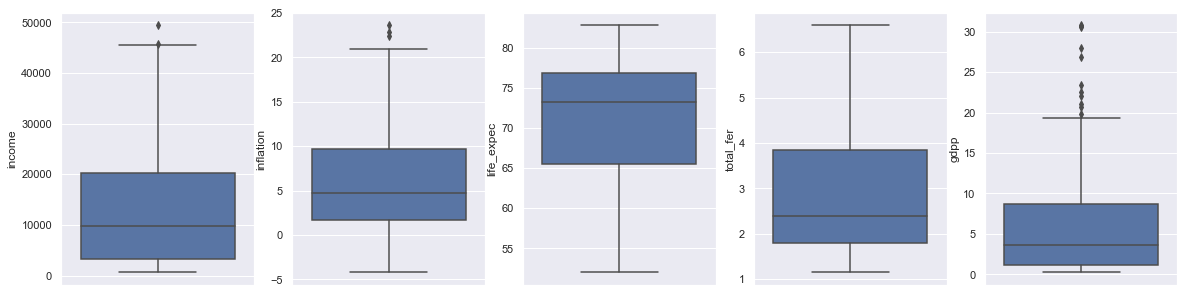

In [239]:
sns.set(style="darkgrid")
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,5))
sns.boxplot(data =data,x='income',ax=ax[0],orient='v')
sns.boxplot(data =data,x='inflation',ax=ax[1],orient='v')
sns.boxplot(data =data,x='life_expec',ax=ax[2],orient='v')
sns.boxplot(data =data,x='total_fer',ax=ax[3],orient='v')
sns.boxplot(data =data,x='gdpp',ax=ax[4],orient='v')


- From the above graphs, outliers has been removed and the points which are seeing above the whiskers are within the quartile range only

In [240]:
data.isnull().sum()

country        0
child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64

In [271]:
# Storing the dataframe after removing the outliers
outlier_removed_data = data

In [272]:
# Removing the null values from the dataset
df = data.dropna()

In [273]:
# Separating country variable
y = df.pop('country')

In [274]:
X = df.copy()

In [275]:
y.value_counts()

Myanmar                           1
Algeria                           1
Malawi                            1
Mozambique                        1
Turkmenistan                      1
Angola                            1
Tanzania                          1
Pakistan                          1
Vanuatu                           1
India                             1
Colombia                          1
St. Vincent and the Grenadines    1
Bolivia                           1
Kazakhstan                        1
Maldives                          1
Libya                             1
Estonia                           1
Cambodia                          1
Antigua and Barbuda               1
Rwanda                            1
China                             1
Eritrea                           1
Mauritania                        1
Costa Rica                        1
El Salvador                       1
Belarus                           1
Mali                              1
Montenegro                  

- So previously there are 167 countries but after removing the outliers it reduced to 128 countries. So it is better to keep the outliers as there are more countries are getting dropped from the dataset

Analysis after removing the outliers

In [276]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [277]:
X_train.shape

(89, 9)

In [278]:
# Now scaling the numerical variables
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)


In [279]:
# Applying PCA
from sklearn.decomposition import PCA

In [280]:
pca = PCA(random_state = 23)

In [281]:
pca.fit(X_train_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)

In [282]:
pca.components_

array([[-0.4437918 ,  0.2042647 ,  0.17532826,  0.14796629,  0.3871844 ,
        -0.22888234,  0.42751786, -0.41773765,  0.38615489],
       [ 0.02591637,  0.4394048 , -0.59578071, -0.18715145,  0.34902507,
         0.51534355,  0.02011657,  0.07322392,  0.15201169],
       [-0.01158394, -0.56269837,  0.0337443 , -0.7499748 ,  0.18877384,
         0.03672243,  0.11769883,  0.00341837,  0.26227215],
       [ 0.34047154,  0.19561905,  0.37970885,  0.06836287,  0.34999793,
        -0.15283764, -0.33347895,  0.44172396,  0.49474626],
       [-0.15459589, -0.02162224,  0.60436351,  0.05948642,  0.00278582,
         0.77360527, -0.00357253, -0.0601534 , -0.06880861],
       [ 0.02519791,  0.4877642 ,  0.21757083, -0.5143984 , -0.08117157,
        -0.16448543, -0.42040011, -0.45651954, -0.17526481],
       [-0.14360019, -0.40287036, -0.21149143,  0.30095673,  0.27560481,
         0.07759248, -0.66082084, -0.38873859,  0.10950067],
       [-0.72460975,  0.05464458,  0.01966545, -0.12574054,  0

In [283]:
pca.explained_variance_ratio_

array([0.46616393, 0.15799974, 0.15342478, 0.09135424, 0.06910204,
       0.02441254, 0.01946501, 0.01079745, 0.00728028])

In [284]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

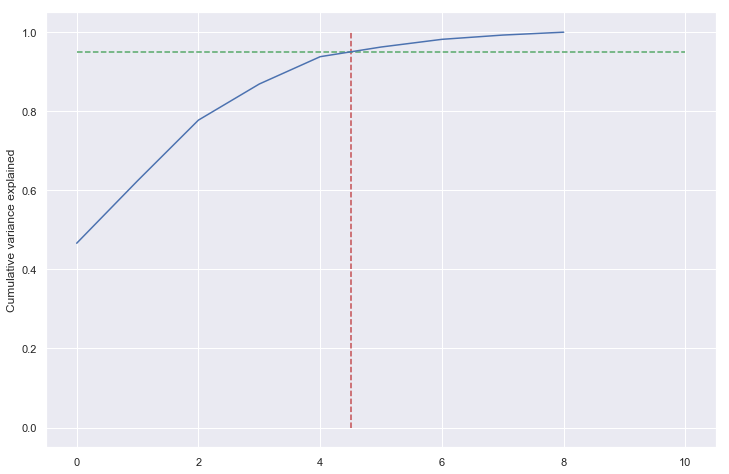

In [285]:
# Plotting scree plot to identify the number of clusters
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4.5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- So from the above graph, it is showing that 4.5 components are able to explain 95% variance from the dataset. Let's take 5 components and apply incremental pca to find the optimum number of components

In [286]:
from sklearn.decomposition import IncrementalPCA

In [287]:
pca_final = IncrementalPCA(n_components=5)

In [288]:
df_train_pca = pca_final.fit_transform(X_train_new)

In [289]:
df_train_pca.shape

(89, 5)

In [290]:
df_test_pca = pca_final.transform(X_test_new)

In [291]:
df_test_pca.shape

(39, 5)

# Analysis of PCA without removing the outliers

In [292]:
df = pd.read_csv('Country-data.csv')

In [293]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [294]:
df['gdpp']= df['gdpp']/1000.0

In [295]:
# Saving column names
names = df.iloc[:,1:].columns

In [296]:
# Now scaling the numerical variables
scaler = StandardScaler()
new_df = scaler.fit_transform(df.iloc[:,1:])

In [297]:
new_df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [298]:
pca_new = PCA(random_state = 22)

In [299]:
pca_new.fit(new_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=22,
  svd_solver='auto', tol=0.0, whiten=False)

In [300]:
pca_new.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [301]:
pca_new.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [302]:
var_cumu = np.cumsum(pca_new.explained_variance_ratio_)

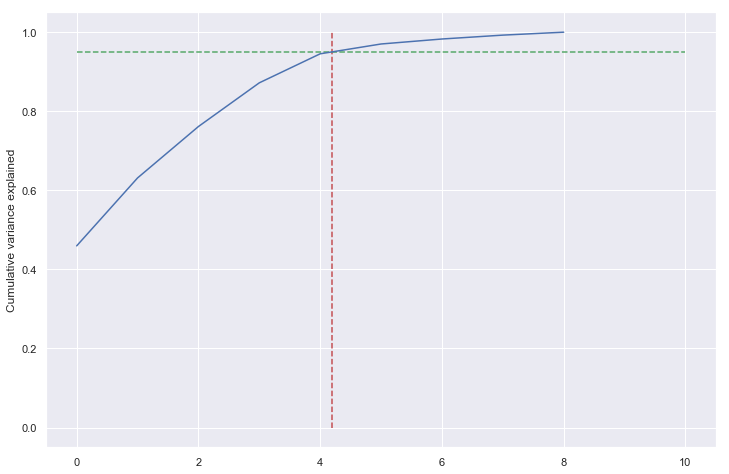

In [303]:
# Plotting scree plot to identify the number of clusters
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4.2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- So without removing the outliers, 4.2 components are able to explain 95% of the variance from the dataset

In [304]:
# Let's take 5 PCA components and modify the dataset
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [305]:
new_df_pca = pca_final.fit_transform(new_df)

In [306]:
pca_final.components_

array([[-0.41967749,  0.28371974,  0.15090765,  0.16157087,  0.39861811,
        -0.1928264 ,  0.42549267, -0.40396116,  0.39266855],
       [ 0.19312245,  0.61357956, -0.24350339,  0.67130924,  0.02407378,
        -0.00332551, -0.22455856,  0.15219983, -0.04573737],
       [-0.03436069,  0.14687014, -0.6044529 , -0.30913862,  0.30002773,
         0.62984364,  0.12047131,  0.02795883,  0.11959861],
       [ 0.37107257,  0.00490633,  0.45432934, -0.07721714,  0.39426589,
         0.14920805, -0.19996777,  0.38322405,  0.53417883],
       [-0.18390053,  0.07043899,  0.51574709,  0.24222051, -0.25069755,
         0.71769058,  0.13980886, -0.08575814, -0.17810981]])

In [307]:
new_df_pca.shape

(167, 5)

In [308]:
# Principal components with their respective columns
print(pd.DataFrame(pca_final.components_,columns=names,index = ['PC-1','PC-2','PC-3','PC-4','PC-5']))

      child_mort   exports    health   imports    income  inflation  \
PC-1   -0.419677  0.283720  0.150908  0.161571  0.398618  -0.192826   
PC-2    0.193122  0.613580 -0.243503  0.671309  0.024074  -0.003326   
PC-3   -0.034361  0.146870 -0.604453 -0.309139  0.300028   0.629844   
PC-4    0.371073  0.004906  0.454329 -0.077217  0.394266   0.149208   
PC-5   -0.183901  0.070439  0.515747  0.242221 -0.250698   0.717691   

      life_expec  total_fer      gdpp  
PC-1    0.425493  -0.403961  0.392669  
PC-2   -0.224559   0.152200 -0.045737  
PC-3    0.120471   0.027959  0.119599  
PC-4   -0.199968   0.383224  0.534179  
PC-5    0.139809  -0.085758 -0.178110  


- From above principal components
   - PC-1 is explaining 45% of variance from the dataset and it says that child_mort,inflation and total_fertility are correlated where as exports,health,imports,income, life_expec and gdpp are correlated to each other.
   - PC-2 is explaining 17% of variance from the datsaet and it says that health, inflation,life_expec,gdp are correlated where as chil_mort, exports, imports, income and total_fertility are correlated to each other

In [309]:
# Converting principal components to seperate dataframe
final_data = pd.DataFrame(new_df_pca, columns=["PC1", "PC2","PC3","PC4","PC5"])
final_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [310]:
# Concatenating principal components and the country column
pca_data=pd.concat([final_data,df['country']],axis=1)

In [311]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda


In [312]:
pca_data.shape

(167, 6)

# Implementing Clustering on the obtained PCA Dataset 

There are 167 unique categories in the country column, creating dummy variables will create 167 columns which is not correct, so we will implement feature hasher to convert them in to 10 different features

In [313]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')
hashed_features = fh.fit_transform(pca_data['country'])


In [314]:
hashed_features

<167x10 sparse matrix of type '<class 'numpy.float64'>'
	with 868 stored elements in Compressed Sparse Row format>

In [315]:
hashed_features = hashed_features.toarray()
hashed_features

array([[ 2., -1.,  0., ...,  0.,  0., -2.],
       [ 2., -2.,  2., ...,  0.,  0.,  0.],
       [ 1., -1.,  1., ...,  0.,  0.,  1.],
       ...,
       [ 1., -1.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ..., -1.,  0.,  2.],
       [ 2., -1.,  0., ...,  0.,  0.,  0.]])

In [316]:
df_cluster = pd.concat([pca_data, pd.DataFrame(hashed_features)],axis=1)
df_cluster.head()

,PC1,PC2,PC3,PC4,PC5,country,0,1,2,3,4,5,6,7,8,9
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,2.0,-1.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-2.0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,2.0,-2.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,4.0,-2.0,3.0,0.0,-2.0,1.0,0.0,0.0,0.0,1.0


In [317]:
# Removing the country column from the dataset
df_cluster = df_cluster.drop(['country'],axis=1)
df_cluster.head()

,PC1,PC2,PC3,PC4,PC5,0,1,2,3,4,5,6,7,8,9
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,2.0,-1.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-2.0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2.0,-2.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,4.0,-2.0,3.0,0.0,-2.0,1.0,0.0,0.0,0.0,1.0


In [463]:
#Calculating the Hopkins statistic 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [464]:
#Let's check the Hopkins measure to verify whether the data is suitable for clustering or not
hopkins(df_cluster)

0.6795870456598869

- So as per Hopkins test, if the value is >0.5 then it is suitable for clustering.
- So we can proceed for implementing clustering on this dataset

In [318]:
# Implementing K-Means algorithm
from sklearn.cluster import KMeans


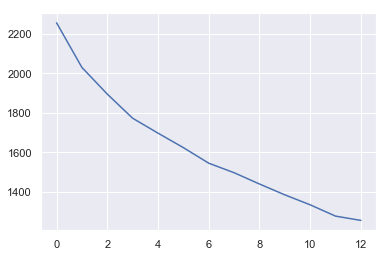

In [319]:
# Elbow-curve/SSD to find the optimum number of clusters
ssd = []
for num_clusters in range(2,15):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

- From the above graph 4 clusters are giving the much variation then after the variation is less in the above graph

In [320]:
# silhouette analysis
from sklearn.metrics import silhouette_score
for num_clusters in range(2,15):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_cluster)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.15972473562365344
For n_clusters=3, the silhouette score is 0.1373986826952319
For n_clusters=4, the silhouette score is 0.13630638648349686
For n_clusters=5, the silhouette score is 0.11047956051098387
For n_clusters=6, the silhouette score is 0.11121767109875189
For n_clusters=7, the silhouette score is 0.11058424833964124
For n_clusters=8, the silhouette score is 0.09401190931608037
For n_clusters=9, the silhouette score is 0.09963989292912297
For n_clusters=10, the silhouette score is 0.09667851919599223
For n_clusters=11, the silhouette score is 0.1049226960286472
For n_clusters=12, the silhouette score is 0.10826563454708218
For n_clusters=13, the silhouette score is 0.0956066964932966
For n_clusters=14, the silhouette score is 0.10966336348322178


- So From silhouette it is good that we can take 4 clusters but let's see by taking 6 clusters first

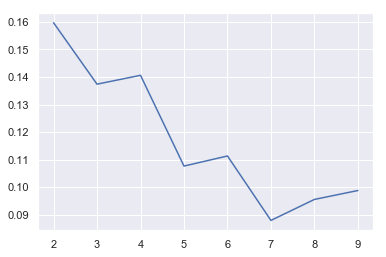

In [465]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_cluster)
    sse_.append([k, silhouette_score(df_cluster, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);    

- From the above graph, we can say 4 clusters is really good to implement

In [321]:

# Model with k=6
kmeans = KMeans(n_clusters=6, max_iter=50,random_state=22)
kmeans.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=22, tol=0.0001, verbose=0)

In [322]:
pca_data['clusters']= kmeans.labels_

In [323]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,country,clusters
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,5
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,5


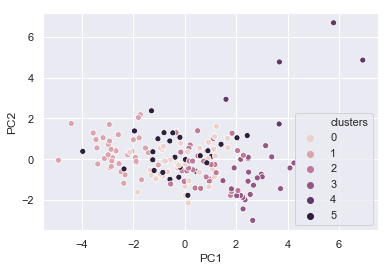

In [468]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x='PC1',y='PC2',hue='clusters',legend='full',data=pca_data)

- The above graph is bit messy when we are taking 6 clusters. We will check this graph again when we are doing analysis with 4 clusters

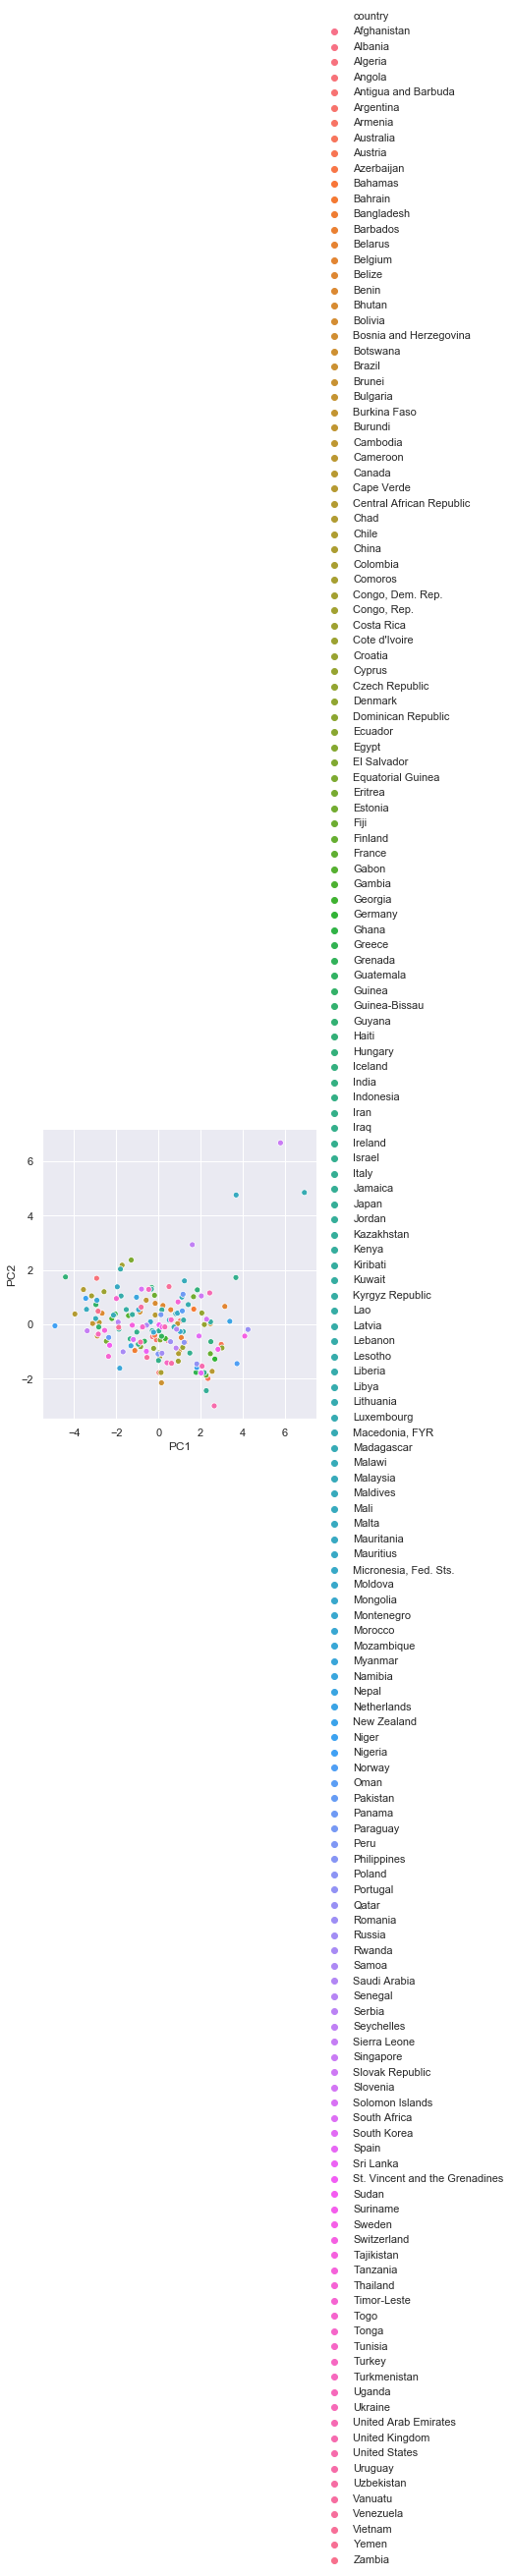

In [324]:
#!pip install -U seaborn
sns.relplot(x='PC1',y='PC2',hue='country',data=pca_data)

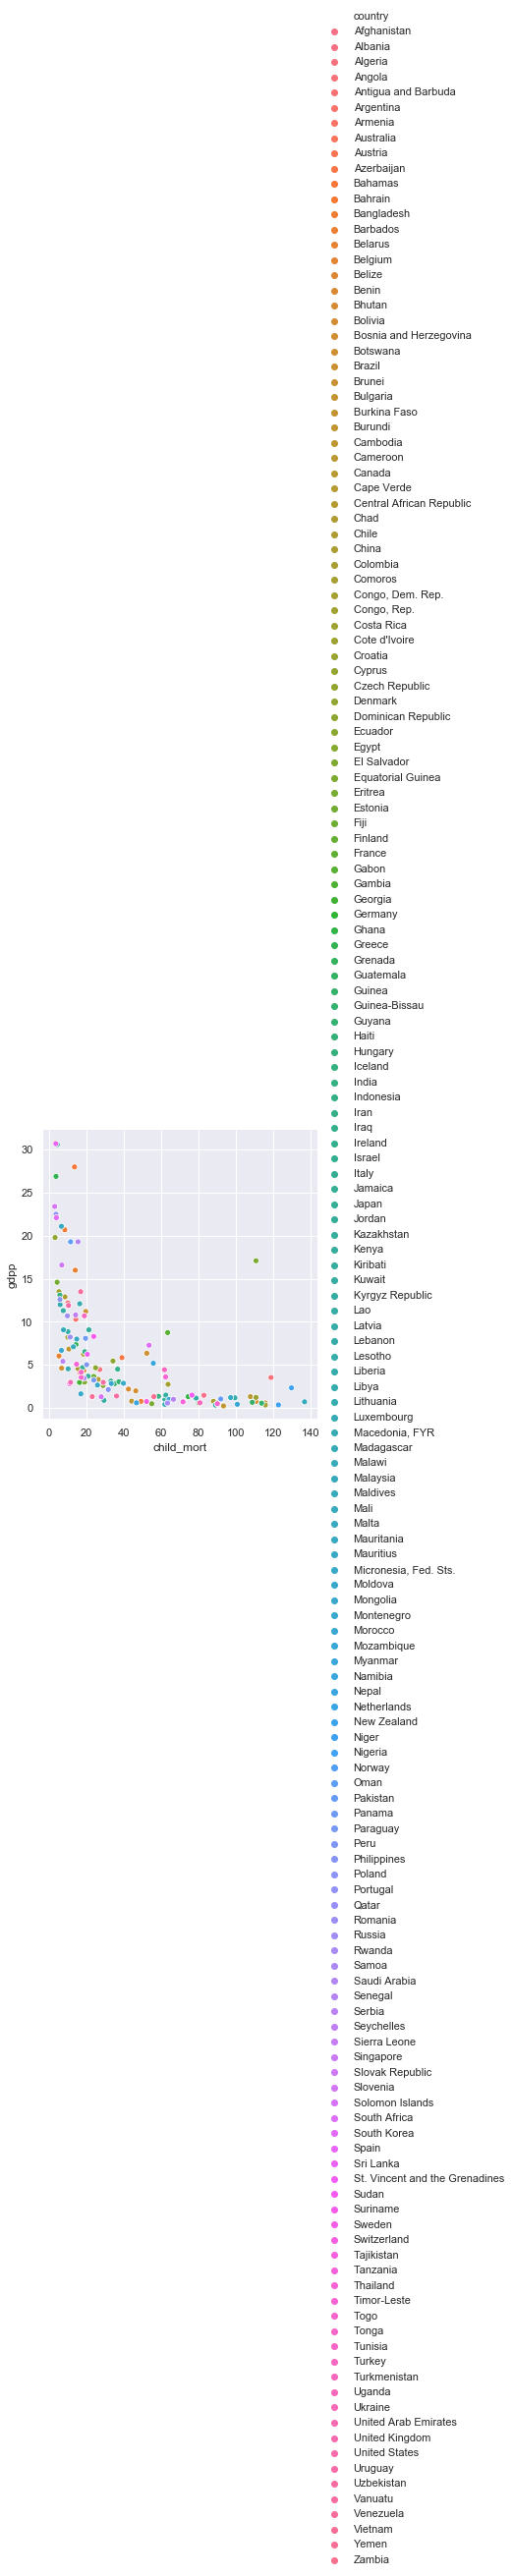

In [325]:
# from the original data
sns.relplot(x='child_mort',y='gdpp',hue='country',data=data)

In [326]:
df['clusters']= pca_data['clusters']

In [327]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,0.553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4.090,5
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4.460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3.530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12.200,5


In [328]:
# Seperating the clusters
cluster0 = df.loc[df['clusters']==0]
cluster1 = df.loc[df['clusters']==1]
cluster2 = df.loc[df['clusters']==2]
cluster3 = df.loc[df['clusters']==3]
cluster4 = df.loc[df['clusters']==4]
cluster5 = df.loc[df['clusters']==5]

In [329]:
# Finding the average values for all variables based on the clusters
df.groupby('clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,24.819512,39.060707,5.588049,42.877217,13573.658537,8.591049,71.902439,2.433902,7.156122
1,95.594737,27.631842,6.476316,41.076316,2795.394737,12.607237,59.168421,5.226842,1.311658
2,13.893548,40.719355,7.688065,49.922581,14566.129032,5.963516,75.351613,2.010323,9.910968
3,4.887500,43.716667,9.281667,37.066667,47012.500000,2.833333,80.554167,1.783333,45.558333
4,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46.440000
5,41.496429,42.050000,6.033929,50.360714,12941.714286,7.693393,68.539286,2.872143,6.747500


- The above dataframe shows the average values of each cluster
- Cluster 3,cluster4 are good in performance.
- Cluster1 and cluster 5 are worest in performance. 
- Cluster 0 and cluster 2 are moderately in performance
we will analyze them seperately

# Cluster 3 Analysis ( Good Performing)

- In cluster3: 
    - Average value of child mortality is 4.8 which is very fine compare to other clusters
    - Average exports are 43.7 and imports are 37.06 which is in good balance
    - Average value of spending on health is 9.28 which is comparatively high from all clusters.
    - Average income lies at 47,012 which is quite reasonably good.
    - Average life_expectancy is 80.5 which is very good
    - Average gdpp value is 45.5. Countries belongs to this cluster are really performing very well.
    - Average inflation value for this cluster is 2.8 only, as these countries are really in good condition.

In [330]:
# Child Mortailty rate
cluster3[cluster3['child_mort']<4.8].sort_values('child_mort').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41.9,3
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46.2,3
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52.1,3
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3


- In cluster3 average child mortality rate is 4.8
- Iceland,Finland,Sweden,Japan and Norway are the countries having less than 4.8 of child mortality value

In [331]:
# Countries having more than average life expectancy of 82
cluster3[cluster3['life_expec']>80].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51.9,3
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41.9,3
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30.7,3


- So, Japan, Switzerland,Australia, Iceland and Spain has more than average life_expectancy

In [332]:
# Countries having more than average income value 45,282
cluster3[cluster3['income']>47012].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70.3,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35.3,3
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38.5,3
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3


- So, Qatar, Brunel, Kuwait, Norway and Switzerland are the countries possessing more than average income

In [333]:
# Countries having more than average of GDP
cluster3[cluster3['gdpp']>45.5].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70.3,3
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58.0,3
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52.1,3


- So, Norway, switzerland, Qatar, Denmark and Sweden are the countries having more than average GDP of45558

In [334]:
# Countries having less than average of inflation
cluster3[cluster3['inflation']<2.8].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30.7,3
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35.8,3
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46.2,3


- So, Japan, Spain, Switzerland,Finland and Italy has less inflation than the average value of 2.8

# Cluster 4 Analysis (Good Performing)

In [335]:
df.groupby('clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,24.819512,39.060707,5.588049,42.877217,13573.658537,8.591049,71.902439,2.433902,7.156122
1,95.594737,27.631842,6.476316,41.076316,2795.394737,12.607237,59.168421,5.226842,1.311658
2,13.893548,40.719355,7.688065,49.922581,14566.129032,5.963516,75.351613,2.010323,9.910968
3,4.887500,43.716667,9.281667,37.066667,47012.500000,2.833333,80.554167,1.783333,45.558333
4,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46.440000
5,41.496429,42.050000,6.033929,50.360714,12941.714286,7.693393,68.539286,2.872143,6.747500


- In cluster4:
    - Average value of child mortality is 6.2 which is very fine compare to other clusters
    - Average exports are 144.960  and imports are 132 which is in good balance
    - Average value of spending on health is 6.59 
    - Average income lies at 51640 which is quite reasonably good.
    - Average life_expectancy is 79.6 which is very good
    - Average gdpp value is 46.440. Countries belongs to this cluster are really performing very well.
    - Average inflation value for this cluster is -0.005200 only, as these countries are really in good condition.

In [336]:
# Child Mortailty rate
cluster4[cluster4['child_mort']<6.2].sort_values('child_mort').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48.7,4


- Luxembourg, Singapore and Ireland are possessing less than average value of child mortality rate

In [337]:
# Countries having more than average life expectancy of 79.6
cluster4[cluster4['life_expec']>79.6].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48.7,4
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21.1,4


- Singapore, Luxembourg, Ireland and Malta has good life expectancy in this cluster

In [338]:
# Countries having more than average income value 51640
cluster4[cluster4['income']>51640].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4


- Luxembourg and Singapore  has more than average value of income in this cluster 

In [339]:
# Countries having more than average of GDP
cluster4[cluster4['gdpp']>46.4].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48.7,4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4


Luxembourg, Ireland and Singapore has good GDPP in this cluster

In [340]:
# Countries having less than average of inflation
cluster4[cluster4['inflation']<-0.005].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10.8,4
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48.7,4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4


- Seychelles, Ireland and Singapore are possessing very good and less inflation in this cluster

# Cluster 0 and 2 Analysis ( Moderately Performing)

In [341]:
df.groupby('clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,24.819512,39.060707,5.588049,42.877217,13573.658537,8.591049,71.902439,2.433902,7.156122
1,95.594737,27.631842,6.476316,41.076316,2795.394737,12.607237,59.168421,5.226842,1.311658
2,13.893548,40.719355,7.688065,49.922581,14566.129032,5.963516,75.351613,2.010323,9.910968
3,4.887500,43.716667,9.281667,37.066667,47012.500000,2.833333,80.554167,1.783333,45.558333
4,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46.440000
5,41.496429,42.050000,6.033929,50.360714,12941.714286,7.693393,68.539286,2.872143,6.747500


- In cluster0:
  - Average value of child mortality is 24.8 which is moderate compare to other clusters
  - Average exports are 39.06 and imports are 42.87 which is in good balance
  - Average value of spending on health is 5.58 which is moderate  from all clusters.
  - Average income lies at 14566.12 
  - Average life_expectancy is 71.9 which is moderately fine
  - Average gdpp value is 7.156. Countries belongs to this cluster are really performing moderately well.
  - Average inflation value for this cluster is 8.59 

- In cluster2:
  - Average value of child mortality is 13.8 which is moderate compare to other clusters
  - Average exports are 40.7 and imports are 49.9 which is in good balance
  - Average value of spending on health is 	6.68 which is moderate  from all clusters.
  - Average income lies at 13981.71
  - Average life_expectancy is 75.35 which is moderately fine
  - Average gdpp value is 9.910.96. Countries belongs to this cluster are really performing moderately well.
  - Average inflation value for this cluster is 5.96


In [342]:
# Child Mortailty rate
cluster0[cluster0['child_mort']<24.8].sort_values('child_mort').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14.60,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6.03,0
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13.50,0
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11.30,0
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9.07,0


- Estonia, Croatia, Belarus, Latvia and Malaysia are has less than average child mortality rate

In [343]:
cluster2[cluster2['child_mort']<13.8].sort_values('child_mort').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23.4,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19.8,2
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26.9,2
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38.9,2
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13.1,2


- Czech Republic, Greece,Slovenia, UK and Hungary  are possessing lowest child mortality rate in this cluster

In [344]:
# Countries having more than average life expectancy 
cluster0[cluster0['life_expec']>71.9].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
39,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8.20,0
117,Panama,19.7,70.0,8.10,78.2,15400,2.590,77.8,2.62,8.08,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16.00,0
148,Thailand,14.9,66.5,3.88,60.8,13500,4.080,76.6,1.55,5.08,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4.46,0


- Costa Rica, Panama, BArbados, Thailand and Algeria has moderate life expectancy

In [345]:
cluster2[cluster2['life_expec']>75.35].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33.70,2
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26.90,2
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38.90,2
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8.86,2
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23.40,2


- New zealand, Greece, UK, Lebanon and Slovenia also posessing moderate life expectancy

In [346]:
# Countries having more than average income 
cluster0[cluster0['income']>14566.12].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19.3,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20.7,0
89,Libya,16.6,65.6,3.88,42.1,29600,14.200,76.1,2.41,12.1,0
125,Russia,10.0,29.2,5.08,21.1,23100,14.200,69.2,1.57,10.7,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28.0,0


- Oman, Bahrain, Libya, Russia and Bahamas has moderate income

In [347]:
# Countries having more than average income 
cluster2[cluster2['income']>13981.71].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38.9,2
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33.7,2
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26.9,2
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23.4,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19.8,2


- UK, Newzealand, Greece, Slovenia and Czech Republic also has moderate income

In [348]:
# Countries having more than average of GDP
cluster0[cluster0['gdpp']> 7.1].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28.0,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20.7,0
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19.3,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16.0,0
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14.6,0


- Bahamas, Bahrain, Oman, Barbados and Estonia has moderate GDPP

In [349]:
# Countries having more than average of GDP
cluster2[cluster2['gdpp']> 9.9].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38.9,2
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33.7,2
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26.9,2
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23.4,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19.8,2


- UK, Newzealand, Greece, Slovenia and Czech Republic also has moderate gdpp

In [350]:
# Countries having less than average of inflation
cluster0[cluster0['inflation']<8.59].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11.30,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28.00,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16.00,0
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13.50,0
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2.83,0


- Latvia, Bahamas, Barbados, Croatia and Morocco has less inflation

In [351]:
# Countries having less than average of inflation
cluster2[cluster2['inflation']<5.96].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19.80,2
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23.40,2
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8.86,2
61,Grenada,14.6,23.8,5.86,49.2,11200,0.480,71.3,2.24,7.37,2
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3.31,2


- Czech Republic, Slovenia, Lebanon, Grenada and Cape Verde also posessing less inflation

# Cluster1 and Cluster5 (Poorly performing)

In [352]:
df.groupby('clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,24.819512,39.060707,5.588049,42.877217,13573.658537,8.591049,71.902439,2.433902,7.156122
1,95.594737,27.631842,6.476316,41.076316,2795.394737,12.607237,59.168421,5.226842,1.311658
2,13.893548,40.719355,7.688065,49.922581,14566.129032,5.963516,75.351613,2.010323,9.910968
3,4.887500,43.716667,9.281667,37.066667,47012.500000,2.833333,80.554167,1.783333,45.558333
4,6.200000,144.960000,6.594000,132.900000,51640.000000,-0.005200,79.620000,1.672000,46.440000
5,41.496429,42.050000,6.033929,50.360714,12941.714286,7.693393,68.539286,2.872143,6.747500


- In cluster1:
  - Average value of child mortality is 95.5 which is very high compare to other clusters
  - Average exports are 27.6 and imports are 41.07. So exports are less and imports are high 
  - Average value of spending on health is 6.47 
  - Average income lies at 2795.39 which is  very less compare to others 
  - Average life_expectancy is 59.16 which is not so good
  - Average gdpp value is 1.311. Countries belongs to this cluster are really performing bad.
  - Average inflation value for this cluster is 12.60 which is very high compare to other clusters 

- In cluster5:
  - Average value of child mortality is 41.4 which is also high compare to other clusters
  - Average exports are 42 and imports are 50, so here also imports are high and exports are less
  - Average value of spending on health is 	6.03 
  - Average income lies at 12941.71
  - Average life_expectancy is 68.5 which is moderately fine
  - Average gdpp value is 6.74. Countries belongs to this cluster are really performing moderately well.
  - Average inflation value for this cluster is 7.6


In [168]:
# Child Mortailty rate
cluster1[cluster1['child_mort']>95.5].sort_values('child_mort',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1


- Haiti, Sierra Leone, Chad, Mali and Nigeria are the countries posessing very bad mortality rate

In [353]:
cluster5[cluster5['child_mort']>41.4].sort_values('child_mort',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,0.446,5
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17.100,5
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1.200,5
116,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1.040,5
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1.490,5


- In addition to the countries in cluster1, Central African Republic, Equatorial Guinea, Mautitania, Pakistan and Kiribati are also posessing high mortality rate

In [354]:
# Countries having less than average life expectancy 
cluster1[cluster1['life_expec']<59.16].sort_values('life_expec',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,0.662,1
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1.170,1
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1.460,1
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,0.459,1
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,0.419,1


- Haiti, Lesotho, Zambia, Malawi and Mozambique are the countries posessing very low life expectancy compare to others

In [355]:
# Countries having less than average life expectancy 
cluster5[cluster5['life_expec']<68.5].sort_values('life_expec',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,0.446,5
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7.280,5
108,Namibia,56.0,47.8,6.78,60.7,8460,3.56,58.6,3.60,5.190,5
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1.490,5
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17.100,5


- In addition to above countries Central African Republic, SA, Namibia, Kiribati and Equatorial Guinea also has low life expectancy

In [356]:
# Countries having less than average income 
cluster1[cluster1['income']<2795.39].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,0.334,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,0.327,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,0.231,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,0.348,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,0.419,1


- "Congo,Dem.Rep." , Liberia, Burundi, Niger and Mozambique countries has very low income compare to other countries

In [357]:
# Countries having less than average income 
cluster5[cluster5['income']<12941.71].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,0.446,5
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1.490,5
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1.290,5
146,Tajikistan,52.4,14.9,5.98,58.6,2110,12.50,69.6,3.51,0.738,5
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,0.786,5


- Central African Republic, Kiribati, Solomon Islands, Tajikistan and Cambodia countries has less than average income

In [358]:
# Countries having less than average of GDP
cluster1[cluster1['gdpp']< 1.31].sort_values('gdpp',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,0.231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,0.327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,0.334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,0.348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,0.399,1


- Burundi, Liberia, Congo,DEm.Rep. , Niger, Sierra Leone countries has very low gdpp

In [359]:
# Countries having less than average of GDP
cluster5[cluster5['gdpp']< 6.7].sort_values('gdpp',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,0.446,5
146,Tajikistan,52.4,14.9,5.98,58.6,2110,12.50,69.6,3.51,0.738,5
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,0.786,5
116,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1.040,5
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1.200,5


- Central African Republic, Tajikistan, Cambodia, Pakistan and Mauritania has also very low gdpp


In [360]:
# Countries having greater than average of inflation
cluster1[cluster1['inflation']>12.60].sort_values('inflation',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2.330,1
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3.600,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1.310,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3.530,1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,0.334,1


- Nigeria, Timor-Leste, Yemen, Angola and Congo,Dem.Rep has very high inflation rate

In [361]:
# Countries having greater than average of inflation
cluster5[cluster5['inflation']>7.6].sort_values('inflation',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17.10,5
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.8,74.4,2.20,2.81,5
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1.20,5
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.2,75.1,2.96,19.30,5
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.5,68.8,2.34,1.38,5


- Equatorial Guinea, Srilanka, Mauritania, Saudi Arabia and Uzbekistan also has very high inflation rate

# Summary of the K- Means Clustering(where K=6)

- **Mortality**:
    1. Good:
        - Iceland,Finland,Sweden,Japan and Norway are the countries having less than 4.8 of child mortality value.
        - Luxembourg, Singapore and Ireland are also possessing less mortality rate in the next
    
    2. Moderate:
        - Estonia, Croatia, Belarus, Latvia and Malaysia has moderate mortality rate
        - Czech Republic, Greece,Slovenia, UK and Hungary following the next moderate list

    3. Poor:
        - Haiti, Sierra Leone, Chad, Mali and Nigeria are the countries posessing very bad mortality rate
        - In addition to the countries in cluster1, Central African Republic, Equatorial Guinea, Mautitania, Pakistan and Kiribati are also posessing high mortality rate

- **Life Expectancy**:
    1. Good:
        - Japan, Switzerland,Australia, Iceland and Spain has more life_expectancy
        - Singapore, Luxembourg, Ireland and Malta follows good life expectancy
    
    2. Moderate:
        - Costa Rica, Panama, BArbados, Thailand and Algeria has moderate life expectancy
        - New zealand, Greece, UK, Lebanon and Slovenia also posessing moderate life expectancy

    3. Poor:
        - Haiti, Lesotho, Zambia, Malawi and Mozambique are the countries posessing very low life expectancy compare to others
        - In addition to above countries Central African Republic, SA, Namibia, Kiribati and Equatorial Guinea also has low life expectancy

- **Income**:
    1. Good:
        - Qatar, Brunel, Kuwait, Norway and Switzerland are the countries possessing more than average income
        - Luxembourg and Singapore follows the next
    
    2. Moderate:
        - Oman, Bahrain, Libya, Russia and Bahamas has moderate income
        - UK, Newzealand, Greece, Slovenia and Czech Republic also has moderate income

    3. Poor:
        - "Congo,Dem.Rep." , Liberia, Burundi, Niger and Mozambique countries has very low income compare to other countries
        - Central African Republic, Kiribati, Solomon Islands, Tajikistan and Cambodia countries has less than average income
- **GDPP**:
    1. Good:
        - Norway, switzerland, Qatar, Denmark and Sweden are the countries posessing more GDP growth
        - Luxembourg, Ireland and Singapore follows the next
    
    2. Moderate:
        - Bahamas, Bahrain, Oman, Barbados and Estonia has moderate GDPP
        - UK, Newzealand, Greece, Slovenia and Czech Republic also has moderate gdpp

    3. Poor:
        - Burundi, Liberia, Congo,DEm.Rep. , Niger, Sierra Leone countries has very low gdpp
        - Central African Republic, Tajikistan, Cambodia, Pakistan and Mauritania has also very low gdpp

- **Inflation**:
    1. Good:
        - Japan, Spain, Switzerland,Finland and Italy has less inflation
        - Seychelles, Ireland and Singapore are also possessing very good and less inflation <br>

    2. Moderate:
        - Latvia, Bahamas, Barbados, Croatia and Morocco has less inflation
        - Czech Republic, Slovenia, Lebanon, Grenada and Cape Verde also posessing less inflation

    3. Poor:
        - Nigeria, Timor-Leste, Yemen, Angola and Congo,Dem.Rep has very high inflation rate
        - Equatorial Guinea, Srilanka, Mauritania, Saudi Arabia and Uzbekistan also has very high inflation rate

# Final model of  K- Means with 4 clusters

In [408]:
# Model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=22)
kmeans.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=22, tol=0.0001, verbose=0)

In [409]:
pca_data['4_clusters']= kmeans.labels_

In [484]:
x = pca_data.drop('clusters',axis=1).head()
x

,PC1,PC2,PC3,PC4,PC5,country,4_clusters
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,1
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,1


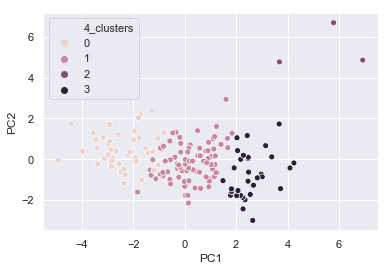

In [469]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x='PC1',y='PC2',hue='4_clusters',legend='full',data=pca_data)

- From the above graphs, we can clearly seen that 4 clusters are separating all the principal components perfectly

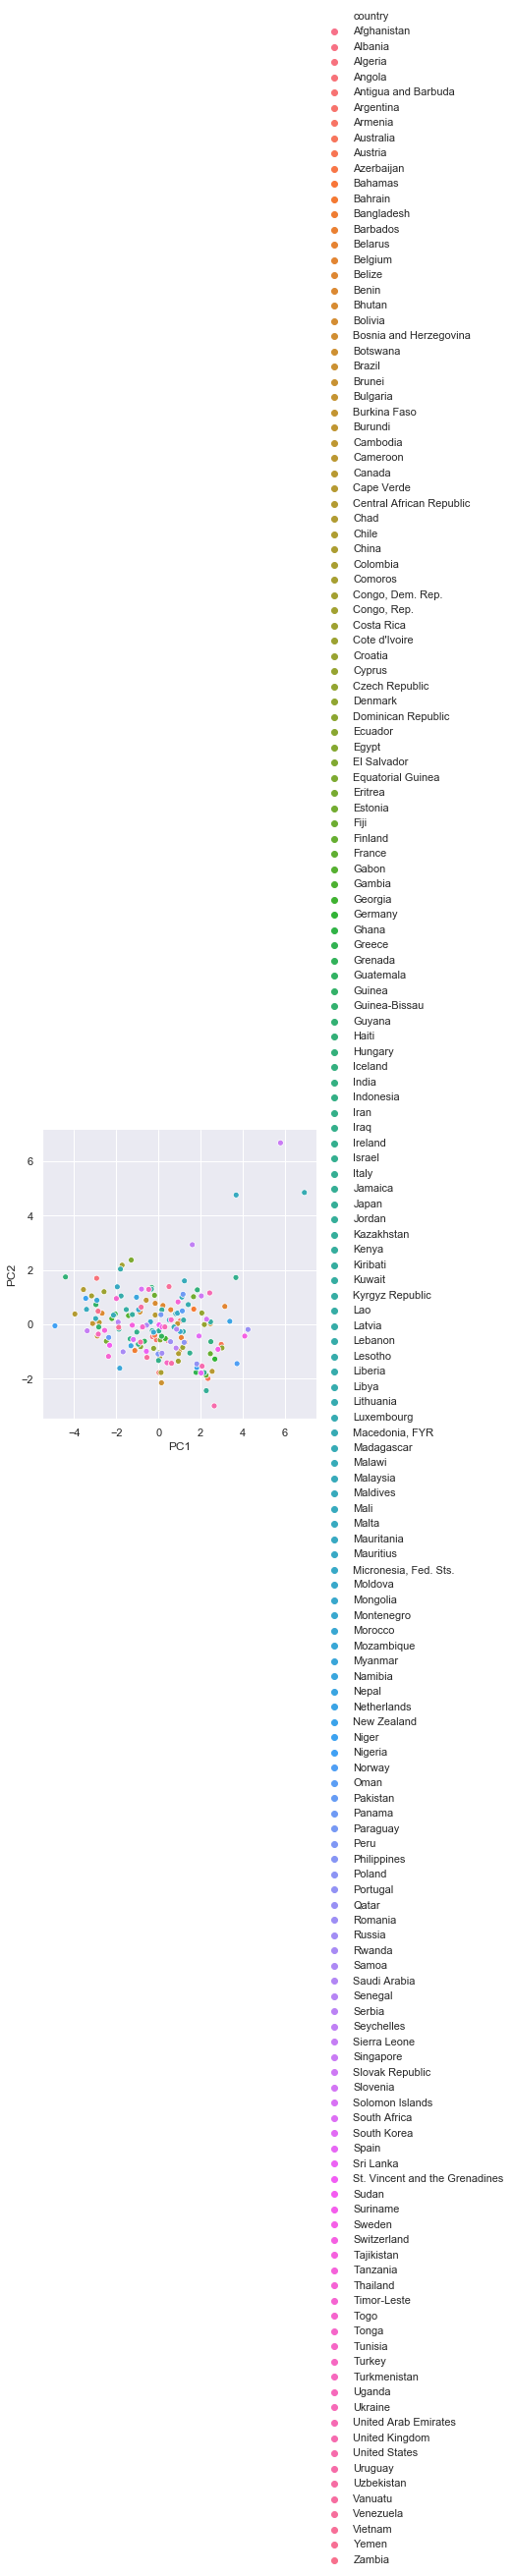

In [471]:
sns.relplot(x='PC1',y='PC2',hue='country',data=pca_data)

In [410]:
df['4_clusters']= pca_data['4_clusters']

In [411]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,0.553,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4.090,5,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4.460,0,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3.530,1,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12.200,5,0,0,1


In [412]:
# Seperating the clusters
final_c0 = df.loc[df['4_clusters']==0]
final_c1 = df.loc[df['4_clusters']==1]
final_c2 = df.loc[df['4_clusters']==2]
final_c3 = df.loc[df['4_clusters']==3]

In [413]:
# Finding the average values for all variables based on the clusters
df.groupby('4_clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4_clusters,,,,,,,,,
0,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1.909208
1,21.695238,40.484393,6.158333,47.112689,12773.690476,7.608405,72.984524,2.282738,6.717524
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57.566667
3,4.968750,47.409375,9.116562,41.650000,44093.750000,2.541281,80.134375,1.775000,41.762500


- So from the above clusters we can see that:
    - Cluster 2 and 3 are performing good
    - Cluster 1 is Moderately performing
    - Cluster 0 is Poorly perforing

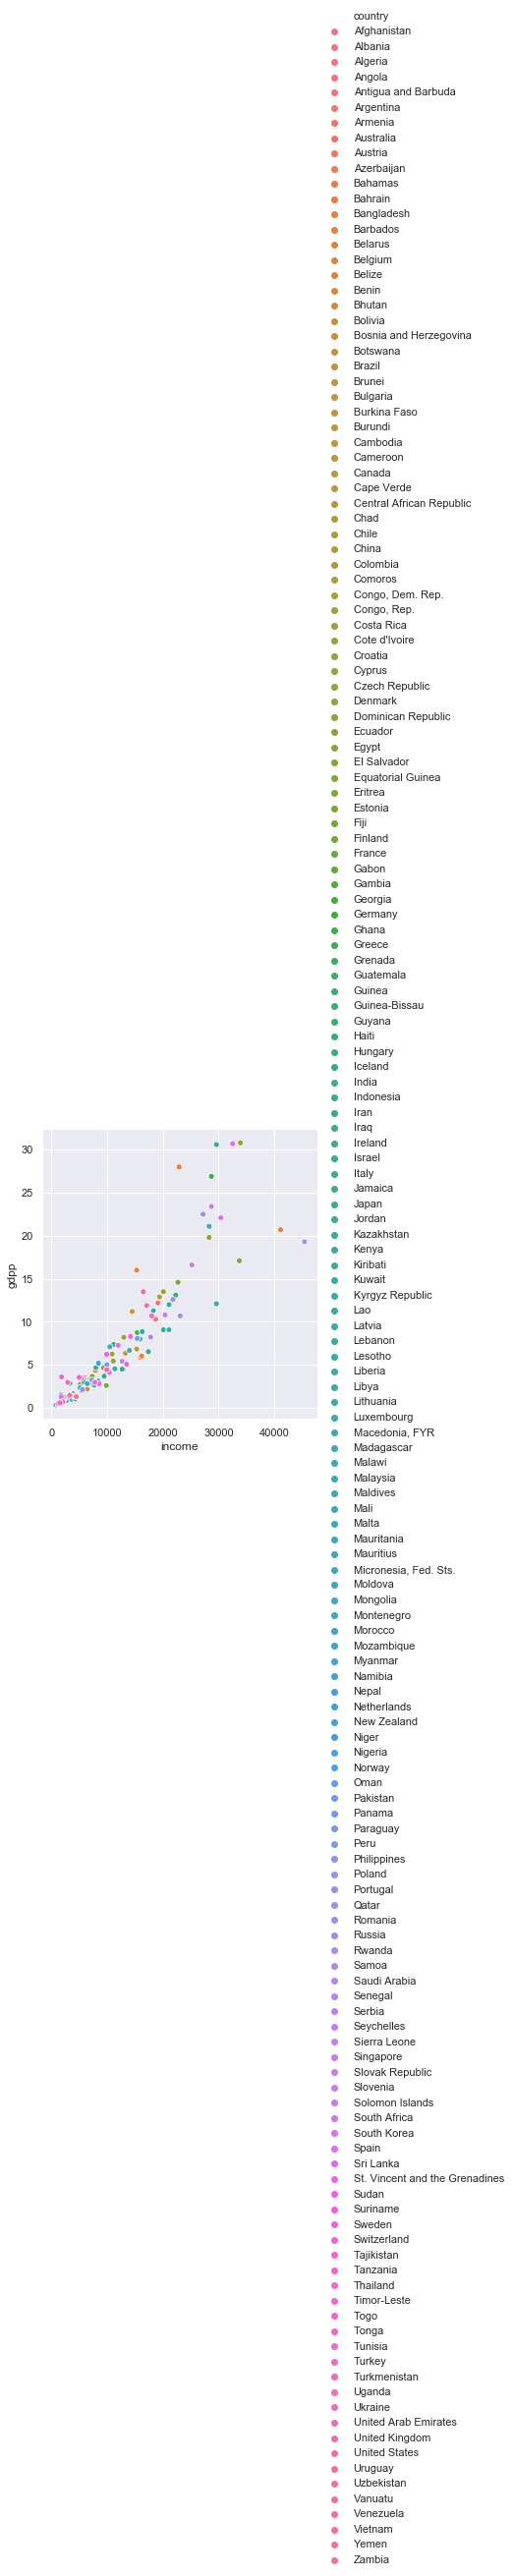

In [478]:
# Income and gdp graph from original dataset
sns.relplot(x='income',y='gdpp',hue='country',legend='full',data=data)

- GDP and income graph from original data, eventhough it is linearly increasing but few countries are posessing very less values

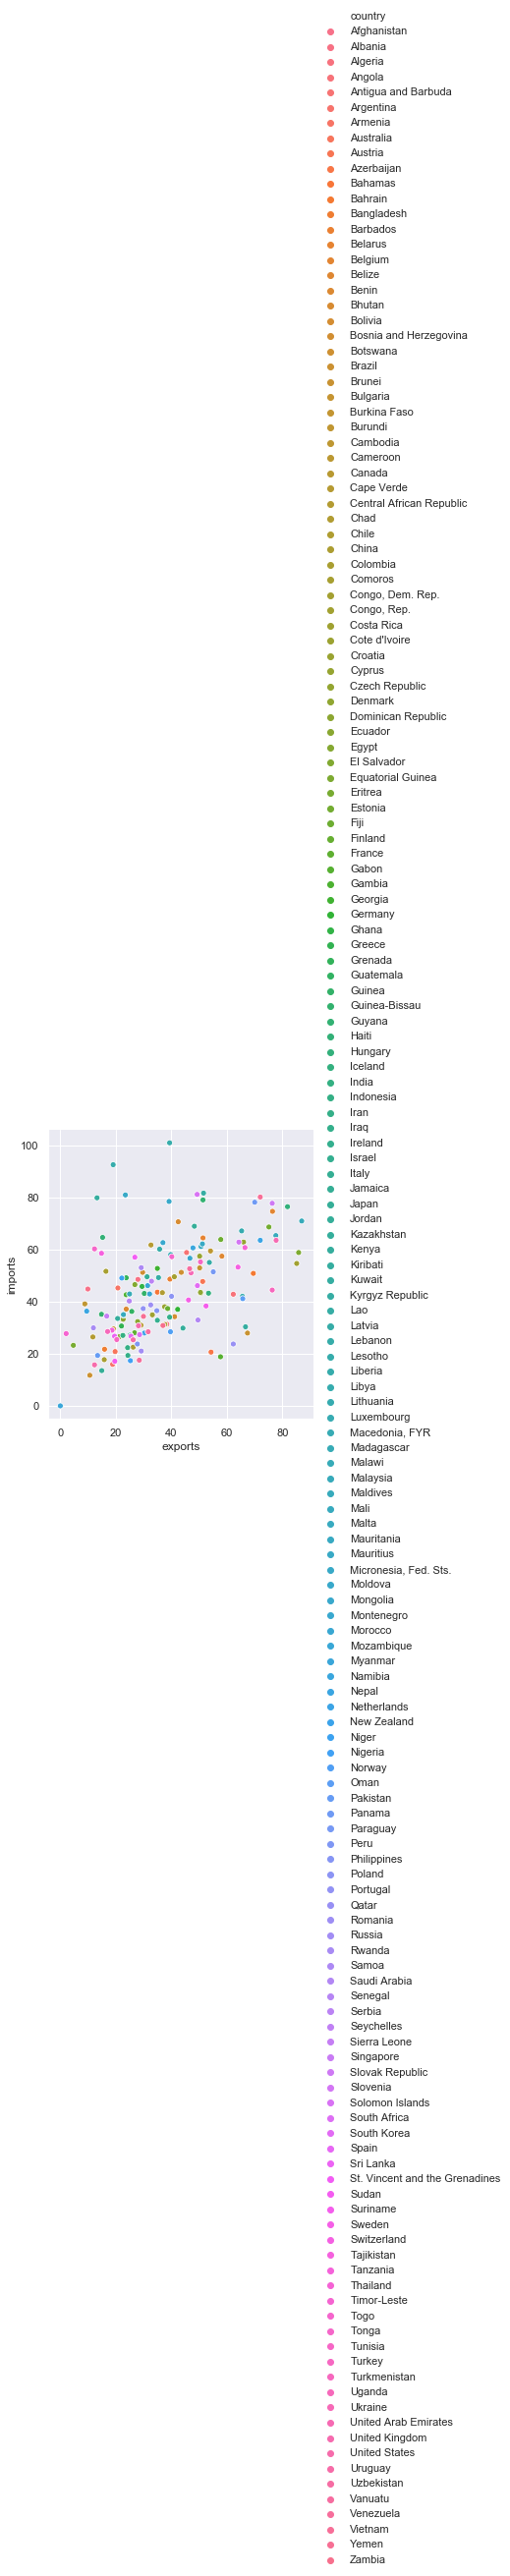

In [479]:
# Graph between exports and imports using original dataset
sns.relplot(x='exports',y='imports',hue='country',legend='full',data=data)

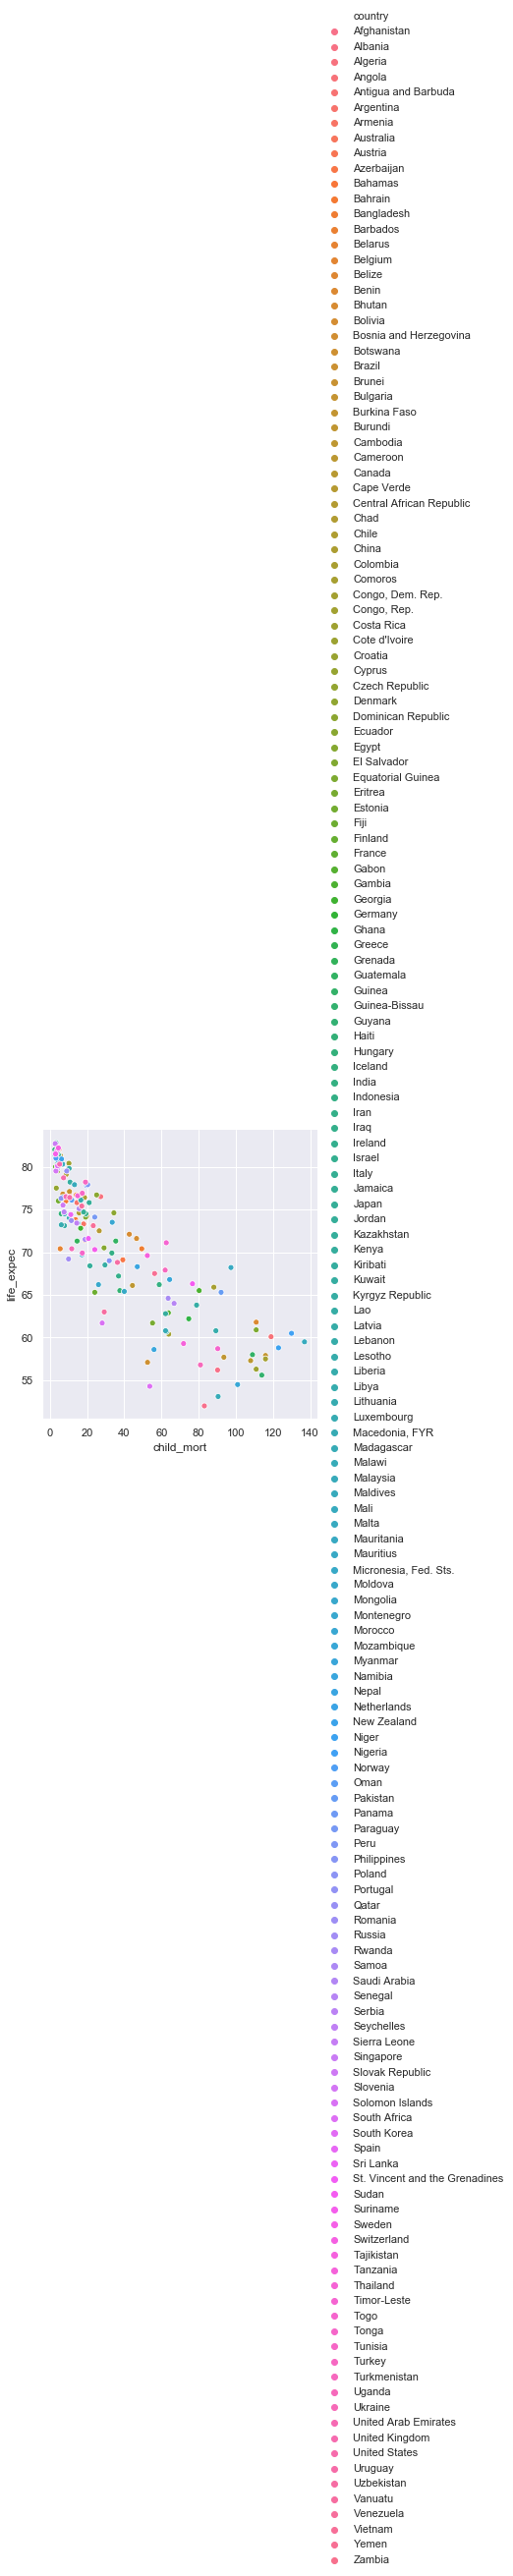

In [481]:
# Plot between child mortality and life expectancy using original dataset
sns.relplot(x='child_mort',y='life_expec',hue='country',legend='full',data=data)

- Life expectancy is very high when child mortality is less

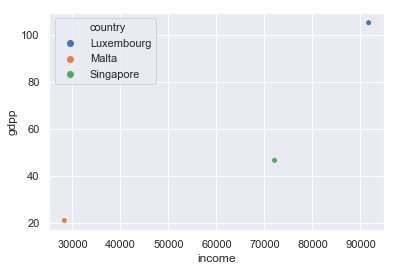

In [472]:
# Plot from good performing cluster
sns.scatterplot(x='income',y='gdpp',hue='country',legend='full',data=final_c2)

- Income and Gdp are in positive correlation 

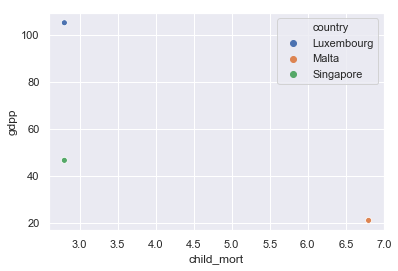

In [473]:
# Plot from good performing clusrer
sns.scatterplot(x='child_mort',y='gdpp',hue='country',legend='full',data=final_c2)

- From the above graph, gdp and mortality rate are in inversely proportion to each other

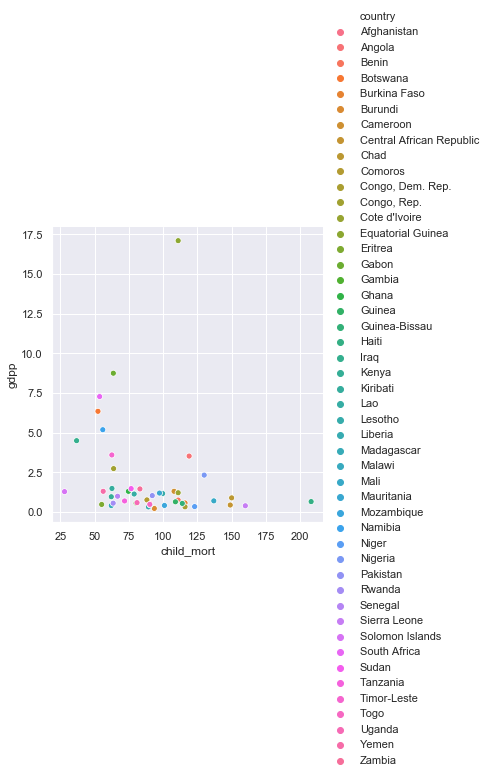

In [475]:
#sns.scatterplot(x='child_mort',y='gdpp',hue='country',legend='full',data=final_c0)
sns.relplot(x='child_mort',y='gdpp',hue='country',legend='full',data=final_c0)

- The above plot shows the countries which are having poor gdp and high child mortality rate

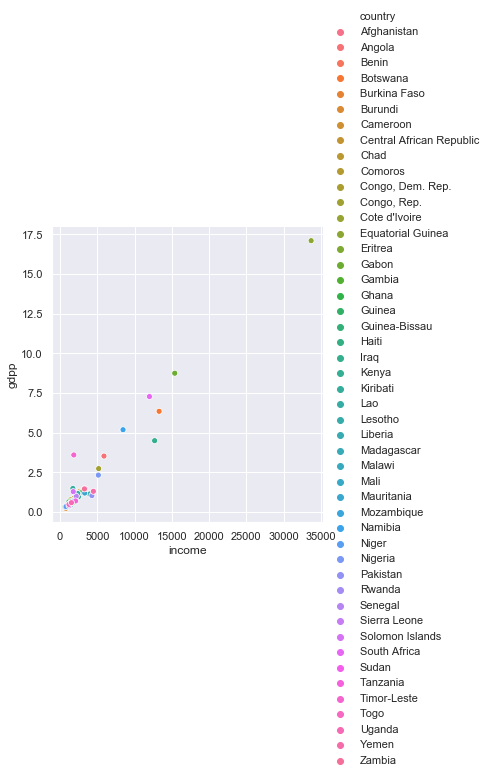

In [476]:
sns.relplot(x='income',y='gdpp',hue='country',legend='full',data=final_c0)

- The above graph shows the countries having low income and low gdp growth

- **Good Performing Clusters**

In [416]:
# Countries having low child Mortality rate
final_c2[final_c2['child_mort']<4.1].sort_values('child_mort',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4,1,2,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2,2


- Luxembourg and Singapore are posessing low mortality rate

In [417]:
# Countries having low child Mortality rate
final_c3[final_c3['child_mort']<4.9].sort_values('child_mort',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41.9,3,0,1,3
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46.2,3,0,1,3
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52.1,3,0,1,3
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23.4,2,0,0,3
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3,0,1,3


- Iceland, Finland, Sweden, Slovenia and Japan also posessing low child mortality rate

In [421]:
# Life expectancy
final_c2[final_c2['life_expec']>81.4].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2,2


- Singapore has good life expectancy

In [420]:
final_c3[final_c3['life_expec']>80.1].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3,0,1,3
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3,0,1,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51.9,3,0,1,3
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41.9,3,0,1,3
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30.7,3,0,1,3


- Japan, Switzerland, Australia, Iceland and Spain has very good life expectancy

In [422]:
# Income
final_c2[final_c2['income']>64033.33].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4,1,2,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2,2


- Luxembourg and Singapore has very good income

In [423]:
final_c3[final_c3['income']>44093.75].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70.3,3,0,1,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35.3,3,0,1,3
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38.5,3,0,1,3
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87.8,3,0,1,3
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35.0,5,0,1,3


- Qatar, Brunei, Kuwait, Norway and UAE also posessing good Income in the country

In [424]:
# Gdp 
final_c2[final_c2['gdpp']>57.5].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105.0,4,1,2,2


- Luxembourg has very good gdp growth

In [428]:
final_c3[final_c3['gdpp']>41.7].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3,0,1,3
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3,0,1,3
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70.3,3,0,1,3
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58.0,3,0,1,3
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52.1,3,0,1,3


- Norway, Switzerland, Qatar, Denmark and Sweden also has good gdp growth

** Moderately performing cluster **

In [431]:
df.groupby('4_clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4_clusters,,,,,,,,,
0,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1.909208
1,21.695238,40.484393,6.158333,47.112689,12773.690476,7.608405,72.984524,2.282738,6.717524
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57.566667
3,4.968750,47.409375,9.116562,41.650000,44093.750000,2.541281,80.134375,1.775000,41.762500


In [433]:
# Countries having low child Mortality rate
final_c1[final_c1['child_mort']<21.6].sort_values('child_mort',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
79,Kazakhstan,21.5,44.2,4.29,29.9,20100,19.50,68.4,2.60,9.07,0,0,0,1
78,Jordan,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3.68,2,0,0,1
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.44,71.6,2.07,6.23,5,0,0,1
119,Peru,20.3,27.8,5.08,23.8,9960,5.71,77.9,2.54,5.02,2,0,0,1
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11.20,0,0,0,1


- Kazakhstan, Jordan,St. Vincent and the Grenadines, Peru and Brazil has moderate child mortality

In [434]:
final_c1[final_c1['life_expec']>72.9].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
39,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8.20,0,0,0,1
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8.86,2,0,0,1
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12.90,2,0,0,1
153,Turkey,19.1,20.4,6.74,25.5,18000,7.010,78.2,2.15,10.70,2,0,0,1
119,Peru,20.3,27.8,5.08,23.8,9960,5.710,77.9,2.54,5.02,2,0,0,1


- Costa Rica, Lebanon, Chile, Turkey and Peru also has good and moderate life expectancy

In [435]:
final_c1[final_c1['income']>12773.6].sort_values('income',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.20,75.1,2.96,19.3,5,0,1,1
115,Oman,11.7,65.7,2.77,41.2,45300,15.60,76.1,2.90,19.3,0,0,1,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20.7,0,0,1,1
89,Libya,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12.1,0,0,1,1
125,Russia,10.0,29.2,5.08,21.1,23100,14.20,69.2,1.57,10.7,0,0,0,1


- Saudi Arabia, Oman, Bahrain, Libya and Russia has moderate income in their country

In [436]:
final_c1[final_c1['gdpp']>6.7].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28.0,0,0,0,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20.7,0,0,1,1
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19.3,5,0,1,1
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19.3,0,0,1,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16.0,0,0,0,1


- Bahamas, Bahrain, Saudi Arabia, Oman and Barbados posessing moderate GDP growth

** Poor performing cluster **

In [438]:
df.groupby('4_clusters')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4_clusters,,,,,,,,,
0,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1.909208
1,21.695238,40.484393,6.158333,47.112689,12773.690476,7.608405,72.984524,2.282738,6.717524
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57.566667
3,4.968750,47.409375,9.116562,41.650000,44093.750000,2.541281,80.134375,1.775000,41.762500


In [439]:
# Countries having Highest mortality rate
final_c0[final_c0['child_mort']>91.6].sort_values('child_mort',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,0.662,1,0,0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,0.399,1,0,0,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,0.897,1,0,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,0.446,5,0,0,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,0.708,1,0,0,0


- Haiti, Sierra Leone, Chad,Central African Republic and Mali has very high child Mortality rate

In [440]:
# Countries having less exports
final_c0[final_c0['exports']<29.5].sort_values('exports',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
149,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.50,71.1,6.23,3.600,1,0,0,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,0.482,1,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,0.231,1,0,0,0
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,0.553,1,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,0.446,5,0,0,0


- Timor-Leste, Eritrea, Burundi, Afganistan and Central African Republic has very less exports

In [441]:
# Countries having More imports
final_c0[final_c0['imports']>43.1].sort_values('imports',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1.170,1,0,0,0
88,Liberia,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,0.327,1,0,0,0
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1.290,5,0,0,0
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1.490,5,0,0,0
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,0.662,1,0,0,0


- Lesotho, Liberia, Solomon Islands, Kiribati and Haiti countries are posessing very high imports.

In [442]:
# Countries has less life expectancy
final_c0[final_c0['life_expec']<59.2].sort_values('life_expec',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,0.662,1,0,0,0
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1.170,1,0,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,0.446,5,0,0,0
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1.460,1,0,0,0
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,0.459,1,0,0,0


- Haiti, Lesotho, Central African Republic, Zambia and Malawi has very less life expectancy

In [443]:
# Countries having less earning income
final_c0[final_c0['income']<3897.35].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,0.334,1,0,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,0.327,1,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,0.231,1,0,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,0.348,1,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,0.446,5,0,0,0


- Congo, Dem. Rep., Liberia, Burundi, Niger and Central African Republic has very less earning income in the country

In [444]:
# Countries having less gdp 
final_c0[final_c0['gdpp']<1.9].sort_values('gdpp',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage,4_clusters
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,0.231,1,0,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,0.327,1,0,0,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,0.334,1,0,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,0.348,1,0,0,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,0.399,1,0,0,0


- Burundi, Liberia, Congo, Dem. Rep., Niger and Sierra Leone has very less gdp growth compare to other countries

# Summary of K-Means Clustering(Where K=4)

- **Good Performing:**
  - Luxembourg, Singapore, Iceland, Finland, Sweden, Slovenia and Japan are possessing low mortality rate  
  - Singapore,Japan, Switzerland, Australia, Iceland and Spain has good life expectancy	
  - Luxembourg,Singapore,Qatar, Brunei, Kuwait, Norway and UAE posessing good Income in the country
  - Luxembourg,Norway, Switzerland, Qatar, Denmark and Sweden has very good gdp growth

- **Moderately Performing:**
  - Kazakhstan, Jordan,St. Vincent and the Grenadines, Peru and Brazil has moderate child mortality
  - Costa Rica, Lebanon, Chile, Turkey and Peru also has good and moderate life expectancy
  - Saudi Arabia, Oman, Bahrain, Libya and Russia has moderate income in their country
  - Bahamas, Bahrain, Saudi Arabia, Oman and Barbados possessing moderate GDP growth

- **Poorly Performing:**
  - Haiti, Sierra Leone, Chad,Central African Republic and Mali has very high child Mortality rate
  - Timor-Leste, Eritrea, Burundi, Afganistan and Central African Republic has very less exports
  - Lesotho, Liberia, Solomon Islands, Kiribati and Haiti countries are possessing very high imports.
  - Haiti, Lesotho, Central African Republic, Zambia and Malawi has very less life expectancy
  - Congo, Dem. Rep., Liberia, Burundi, Niger and Central African Republic has very less earning income in the country
  - Burundi, Liberia, Congo, Dem. Rep., Niger and Sierra Leone has very less gdp growth compare to other countries



# Hierarchical Clustering

In [139]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,country,clusters
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,5
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,5


In [140]:
# Now will take only the principal components
hc_data = pca_data.drop(['country','clusters'],axis=1)
hc_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


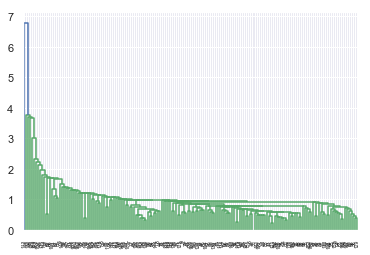

<Figure size 1440x1440 with 0 Axes>

In [146]:
# Single Linkage
mergings = linkage(hc_data, method="single", metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=(20,20))
plt.show()

- It seems the graph is bit messy but let's take 4 clusters and see the output

In [149]:
sl_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
sl_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [362]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,0.553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4.090,5
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4.460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3.530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12.200,5


In [363]:
# Appending single linkage clusters to the original dataframe
df['single_linkage'] = sl_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,0.553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4.090,5,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4.460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3.530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12.200,5,0


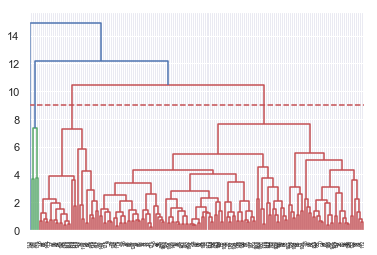

In [364]:
# complete linkage
mergings_complete = linkage(hc_data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.axhline(y=9, color='r', linestyle='--')
plt.show()

- From the above dendogram, the more the length of vertical line the more the distance between the clusters. So here if we cut the line at 9 then we get 4 clusters 

In [365]:
cl_labels = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cl_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [366]:
# Appending complete linkage cluster labels to the original dataframe
df['complete_linkage'] = cl_labels

In [367]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,0.553,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4.090,5,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4.460,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3.530,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12.200,5,0,0


In [368]:
df.groupby('single_linkage')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
single_linkage,,,,,,,,,
0,38.143293,39.420116,6.837927,45.715036,16428.128049,7.268244,70.477439,2.949329,12.262707
1,2.800000,175.000000,7.770000,142.000000,91700.000000,3.620000,81.300000,1.630000,105.000000
2,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2.330000
3,2.800000,200.000000,3.960000,174.000000,72100.000000,-0.046000,82.700000,1.150000,46.600000


- From the above Single linkage clusters, cluster 1 and cluster 3 are showing good performance where as cluster 0 has moderate and cluster 2 is showing  poor performance

In [369]:
# Seperating the clusters
sl_0 = df.loc[df['single_linkage']==0]
sl_1 = df.loc[df['single_linkage']==1]
sl_2 = df.loc[df['single_linkage']==2]
sl_3 = df.loc[df['single_linkage']==3]


# Single linkage Clustering Analysis

# Good Performance Clusters

In [370]:
sl_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105.0,4,1,2


In [371]:
sl_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2


- So, Luxembourg and Singapore are posessing good in all factors of Child_mortality, exports, imports, health, inflation, life expectancy,total_fertility and  gdpp.

# Moderate performance cluster

In [372]:
sl_0[sl_0['child_mort']>38.143].sort_values('child_mort',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5.840,5,0,0
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.80,65.4,3.46,2.860,5,0,0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2.180,0,0,0
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,0.786,5,0,0
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1.980,0,0,0


- Azerbaijan, "Micronesia, Fed. Sts.", Bhutan, Cambodia and Bolivia has moderate child mortality rate

In [373]:
sl_0[sl_0['life_expec']>70.4].sort_values('life_expec',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
47,Egypt,29.1,21.3,4.66,26.6,9860,10.10,70.5,3.19,2.60,0,0,0
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3.60,1,0,0
62,Guatemala,35.4,25.8,6.85,36.3,6710,5.14,71.3,3.38,2.83,0,0,0
61,Grenada,14.6,23.8,5.86,49.2,11200,0.48,71.3,2.24,7.37,2,0,0
16,Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4.34,2,0,0


- Egypt, Timor- Leste, Guatemala, Grenada and Belize has moderate life expectancy

In [374]:
sl_0[sl_0['income']>16428.12].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13.50,2,0,0
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11.90,2,0,0
71,Iran,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6.53,0,0,0
124,Romania,11.5,32.6,5.58,38.8,17800,3.53,73.7,1.59,8.23,0,0,0
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10.70,2,0,0


- Venezuela, Uruguay, Iran, Romania and Turkey posessing moderate income in their country

In [375]:
sl_0[sl_0['inflation']>7.26].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9.070,0,0,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20.700,0,0,1
46,Ecuador,25.1,27.9,8.06,32.4,9350,7.47,76.7,2.66,4.660,2,0,0
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,0.419,1,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3.220,2,0,0


- Malaysia, Bahrain, Ecuador, Mozambique and Armenia posessing moderate inflation

In [376]:
sl_0[sl_0['gdpp']>12.26].sort_values('gdpp',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
121,Poland,6.0,40.1,7.46,42.1,21800,1.660,76.3,1.41,12.6,2,0,0
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12.9,2,0,0
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13.1,2,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13.5,2,0,0
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13.5,0,0,0


- Poland, Chile, Hungary, Venezuela and Croatia has moderate gdpp growth

# Poor Performance Cluster

In [377]:
sl_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2.33,1,2,3


- So Nigria is the only country which has overall poor performance in child mortality, exports, imports, life_expectancy and gdpp

# Summary of Single Linkage

1. Good:
    - Luxembourg and Singapore are posessing good in all factors of Child_mortality, exports, imports, health, inflation, life expectancy,total_fertility and gdpp.
2. Moderate:
    - Azerbaijan, "Micronesia, Fed. Sts.", Bhutan, Cambodia and Bolivia has moderate child mortality rate
    - Egypt, Timor- Leste, Guatemala, Grenada and Belize has moderate life expectancy
    - Venezuela, Uruguay, Iran, Romania and Turkey posessing moderate income in their country
    - Malaysia, Bahrain, Ecuador, Mozambique and Armenia posessing moderate inflation
    - Poland, Chile, Hungary, Venezuela and Croatia has moderate gdpp growth
3. Poor:
    - Nigria is the only country which has overall poor performance in child mortality, exports, imports, life_expectancy and gdpp

# Complete Linkage Clustering Analysis

In [378]:
df.groupby('complete_linkage')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
complete_linkage,,,,,,,,,
0,45.822727,36.301508,6.426818,46.026257,9463.734848,8.042568,68.264394,3.205455,5.414273
1,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42.150000
2,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45.875000
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2.330000


- From the above clusters, 1 and 2 are having good performance, cluster 0 is moderate and cluster 3 is posessing porr performance

In [379]:
# Seperating the clusters
cl_0 = df.loc[df['complete_linkage']==0]
cl_1 = df.loc[df['complete_linkage']==1]
cl_2 = df.loc[df['complete_linkage']==2]
cl_3 = df.loc[df['complete_linkage']==3]


** Good Performing cluster analysis **

In [380]:
# Child mortality 
cl_1[cl_1['child_mort']<6.19].sort_values('child_mort',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41.9,3,0,1
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52.1,3,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46.2,3,0,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3,0,1
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3,0,1


- Iceland, Sweden, Finland, Norway and Japan has low child mortality rate

In [381]:
cl_2[cl_2['child_mort']<6.7].sort_values('child_mort',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4,1,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2


- Luxembourg and Singapore also has low mortality rate

In [382]:
# Income
cl_1[cl_1['income']>46543.3].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48.4,3,0,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3,0,1
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35.0,5,0,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3,0,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38.5,3,0,1


- US, Switzerland, UAE, Norway and Kuwait has good income

In [383]:
cl_2[cl_2['income']>53125.00].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4,1,2


- Singapore and Luxembourg also has good income

In [384]:
# Life_expectancy
cl_1[cl_1['life_expec']>79.79].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3,0,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3,0,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51.9,3,0,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41.9,3,0,1
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30.7,3,0,1


- Japan, Switzerland, Australia, Iceland and Spain countries has good life expectancy

In [385]:
cl_2[cl_2['life_expec']>79.42].sort_values('life_expec',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4,1,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21.1,4,0,2


- On the other hand Singapore, Luxembourg and Malta also has good life expectancy

In [386]:
# Inflation
cl_1[cl_1['inflation']<4.35].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48.7,4,0,1
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44.5,3,0,1
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30.7,3,0,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3,0,1
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35.8,3,0,1


- Ireland, Japan, Spain, Switzerland and Italy has very low inflation 

In [387]:
cl_2[cl_2['inflation']<0.79].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10.8,4,0,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2


- Seychelles and Singapore also has low inflation

In [388]:
# Gdpp
cl_1[cl_1['gdpp']>42.1].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87.8,3,0,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74.6,3,0,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70.3,3,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58.0,3,0,1
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52.1,3,0,1


- Norway, Switzerland, Qatar, Denmark and sweden has good gdpp

In [389]:
cl_2[cl_2['gdpp']>45.8].sort_values('gdpp',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105.0,4,1,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46.6,4,3,2


- Luxembourg and Singapore has good gdp growth

** Moderate performing Cluster **

In [390]:
df.groupby('complete_linkage')['child_mort','exports','health','imports','income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
complete_linkage,,,,,,,,,
0,45.822727,36.301508,6.426818,46.026257,9463.734848,8.042568,68.264394,3.205455,5.414273
1,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42.150000
2,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45.875000
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2.330000


In [391]:
# Child mortality 
cl_0[cl_0['child_mort']>45.82].sort_values('child_mort',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
19,Bolivia,46.6,41.20,4.84,34.3,5410,8.78,71.6,3.20,1.980,0,0,0
109,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,0.592,0,0,0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.14,70.4,2.33,0.758,0,0,0
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.50,69.6,3.51,0.738,5,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6.350,0,0,0


- Bolivia, Nepal, Bangladesh, Tajikistan and Botswana has moderate child mortality rate

In [392]:
# income
cl_0[cl_0['income']>9463.73].sort_values('income',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
78,Jordan,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3.68,2,0,0
34,China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4.56,0,0,0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.40,76.8,1.31,4.61,2,0,0
47,Egypt,29.1,21.3,4.66,26.6,9860,10.10,70.5,3.19,2.60,0,0,0
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.44,71.6,2.07,6.23,5,0,0


- Jordan, China, 'Bosnia and Herzegovina', Egypt and 'St. Vincent and the Grenadines' has Moderate income

In [393]:
# Life expectancy
cl_0[cl_0['life_expec']>68.26].sort_values('life_expec',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
109,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,0.592,0,0,0
79,Kazakhstan,21.5,44.20,4.29,29.9,20100,19.50,68.4,2.60,9.070,0,0,0
83,Kyrgyz Republic,29.6,51.60,6.18,81.7,2790,10.00,68.5,3.10,0.880,2,0,0
161,Uzbekistan,36.3,31.70,5.81,28.5,4240,16.50,68.8,2.34,1.380,5,0,0
120,Philippines,31.9,34.80,3.61,36.6,5600,4.22,69.0,3.16,2.130,5,0,0


- Nepal, Kazakshtan, Kyrgyz Republic, Uzbekistan and Phillippines has moderate life expectancy

In [394]:
# Inflation
cl_0[cl_0['inflation']>8.04].sort_values('inflation',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11.200,0,0,0
78,Jordan,21.1,48.3,8.04,69.0,9470,8.43,75.8,3.66,3.680,2,0,0
57,Georgia,16.5,35.0,10.10,52.8,6730,8.55,72.8,1.92,2.960,2,0,0
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1.980,0,0,0
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,0.413,0,0,0


- Brazil, Jordan, Georgia, Bolivia and Madagascar has moderate inflation rate

In [395]:
# Gdpp
cl_0[cl_0['gdpp']>5.4].sort_values('gdpp',ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
130,Serbia,7.6,32.9,10.40,47.9,12700,5.88,74.7,1.40,5.41,2,0,0
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.60,5.45,5,0,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5.84,5,0,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6.03,0,0,0
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.44,71.6,2.07,6.23,5,0,0


- Dominican Republic, Azerbaijan, Belarus,"St. Vincent and the Grenadines" and Colombia has moderate gdpp growth

** Poor Performing Cluster **

In [396]:
cl_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,single_linkage,complete_linkage
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2.33,1,2,3


- Nigeria is the only country performing very poor in all the fators like child mortality , exports,inflation, life expectancy and gdpp

# Summary of Complete Linkage

1. Good:
    - Iceland, Sweden, Finland, Norway and Japan has low child mortality rate
    - Luxembourg and Singapore also has low mortality rate

    - US, Switzerland, UAE, Norway and Kuwait has good income
    - Singapore and Luxembourg also has good income

    - Japan, Switzerland, Australia, Iceland and Spain countries has good life expectancy
    - On the other hand Singapore, Luxembourg and Malta also has good life expectancy

    - Ireland, Japan, Spain, Switzerland and Italy has very low inflation
    - Seychelles and Singapore also has low inflation

    - Norway, Switzerland, Qatar, Denmark and sweden has good gdpp
    - Luxembourg and Singapore also has good gdp growth


2. Moderate:
    - Bolivia, Nepal, Bangladesh, Tajikistan and Botswana has moderate child mortality rate
    - Jordan, China, 'Bosnia and Herzegovina', Egypt and 'St. Vincent and the Grenadines' has Moderate income
    - Nepal, Kazakshtan, Kyrgyz Republic, Uzbekistan and Phillippines has moderate life expectancy
    - Brazil, Jordan, Georgia, Bolivia and Madagascar has moderate inflation rate
    - Dominican Republic, Azerbaijan, Belarus,"St. Vincent and the Grenadines" and Colombia has moderate gdpp growth


3. Poor:
    - Nigeria is the only country performing very poor in all the fators like child mortality , exports,inflation, life expectancy and gdpp


# Analysing the countries which are fallen under outliers

In [446]:
# Countries falling under Outliers
outlier_removed_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,0.553
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4.090
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4.460
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3.530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12.200


In [458]:
# Getting the list of countries from outliers
refined_outlier_df=outlier_removed_data.loc[outlier_removed_data['child_mort'].isnull()|outlier_removed_data['exports'].isnull()
                         |outlier_removed_data['health'].isnull()|outlier_removed_data['imports'].isnull()
                        |outlier_removed_data['income'].isnull()|outlier_removed_data['inflation'].isnull()
                        |outlier_removed_data['life_expec'].isnull()|outlier_removed_data['total_fer'].isnull()|
                         outlier_removed_data['gdpp'].isnull()].reset_index().drop('index',axis=1)

In [462]:
refined_outlier_df['country']

0                    Australia
1                      Austria
2                      Belgium
3                       Brunei
4                       Canada
5     Central African Republic
6                         Chad
7                      Denmark
8            Equatorial Guinea
9                      Finland
10                      France
11                     Germany
12                       Haiti
13                     Iceland
14                     Ireland
15                       Italy
16                       Japan
17                      Kuwait
18                     Lesotho
19                  Luxembourg
20                       Malta
21       Micronesia, Fed. Sts.
22                    Mongolia
23                 Netherlands
24                 New Zealand
25                       Niger
26                     Nigeria
27                      Norway
28                       Qatar
29                  Seychelles
30                Sierra Leone
31                   Singapore
32      

- So, the above countries are fallen under outliers due to some exceptionally high or low values but when we analyze the clusters from KMeans by including all the variables we could see that few countries are falling under Good, Moderate and Poor Performance. In the list you can see Singapore, Switzerland etc... Those countries are exceptionally performing very well where as few countries like Haiti, Nigeria,Central African Republic as very poor performance which are in neccessity of aid. So our analysis is not impacting while including the outliers with the initial analysis

# Final Summary Report to CEO:

- Compare to all the clustering results, KMeans when k=4 is giving the desirable results 
    - **Good Performing**:
        - Luxembourg, Singapore, Switzerland, Qatar and Norway are performing exceptionally very well in all aspects
    - **Poorly Performing **   
         - Haiti, Sierra Leone, Chad,Central African Republic and Mali has very high child Mortality rate
         - Timor-Leste, Eritrea, Burundi, Afganistan and Central African Republic has very less exports
         - Lesotho, Liberia, Solomon Islands, Kiribati and Haiti countries are possessing very high imports.
         - Haiti, Lesotho, Central African Republic, Zambia and Malawi has very less life expectancy
         - Congo, Dem. Rep., Liberia, Burundi, Niger and Central African Republic has very less earning income in the country
         - Burundi, Liberia, Congo, Dem. Rep., Niger and Sierra Leone has very less gdp growth compare to other countries
            
    - **Among all countries "Haiti, Burundi,Sierra Leone,Central African Republic and Liberia" are the main countries which are in direst need of aid by posessing  high child mortality, Low income, Low gdp, low life expectancy,less exports and more imports**       